In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!cp /content/gdrive/MyDrive/Measurement_summary.csv /content/

In [ ]:
#install java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

#install spark
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

#unzip the spark file to the current folder in colab
!tar -xf spark-3.0.0-bin-hadoop3.2.tgz

#set the spark folder to system path environment
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
#install findspark using pip
!pip install -q findspark

In [ ]:
!pip install pyspark==3.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044160 sha256=f8a36c83e74dd6025b4f0fa818aef05ef339dcd5e8d49facf9676f53f02cbb18
  Stored in directory: /root/.cache/pip/wheels/b1/bb/8b/ca24d3f756f2ed967225b0871898869db676eb5846df5adc56
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
import findspark
findspark.init()

In [ ]:
import py4j

In [ ]:
#check the pyspark version
import pyspark
print(pyspark.__version__)

3.0.0


In [ ]:
ls

gdrive/                  sample_data/                spark-3.0.0-bin-hadoop3.2.tgz
Measurement_summary.csv  spark-3.0.0-bin-hadoop3.2/


In [ ]:
import findspark
findspark.init("spark-3.0.0-bin-hadoop3.2")#spark_home

In [ ]:
from pyspark import SparkConf,SparkContext
from pyspark.sql import SQLContext,SparkSession

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

#Test the spark
df = spark.createDataFrame([{"BIG DATA STW 7082CEM": "~Spark~ the work in a great way !\nLets start ~Spark*ling ~ begins"} for x in range(5)])


df.show(3,False)



/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/session.py:378: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----------------------------------------------------------------+
|BIG DATA STW 7082CEM                                             |
+-----------------------------------------------------------------+
|~Spark~ the work in a great way !
Lets start ~Spark*ling ~ begins|
|~Spark~ the work in a great way !
Lets start ~Spark*ling ~ begins|
|~Spark~ the work in a great way !
Lets start ~Spark*ling ~ begins|
+-----------------------------------------------------------------+
only showing top 3 rows



In [ ]:
import pandas as pd


In [ ]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
file_csv_loc='/content/Measurement_summary.csv'#data from kaggle

In [ ]:
#load Dataset
df=spark.read.csv(file_csv_loc,inferSchema=True,header=True)

In [ ]:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
df.show()

+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|
+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+
|2017-01-01 00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.059|               0.002|1.2|73.0| 57.0|
|2017-01-01 01:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.058|               0.002|1.2|71.0| 59.0|
|2017-01-01 02:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.056|               0.002|1.2|70.0| 59.0|
|2017-01-01 03:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.056|               0.002|1.2|70.0| 58.0|
|2017-01-01 04:00|         

In [ ]:
print(df.columns) #printcolumns

['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude', 'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']


In [ ]:
#Columns needed to be renamed due to some problems with issues columns PM2.5 due to its naming.
df = df.withColumnRenamed("Measurement date","Measurement_date")\
       .withColumnRenamed("Station code","Station_code")\
       .withColumnRenamed("PM2.5","PM2_5")

In [ ]:
df.schema.names #print column names after renaming the column names

['Measurement_date',
 'Station_code',
 'Address',
 'Latitude',
 'Longitude',
 'SO2',
 'NO2',
 'O3',
 'CO',
 'PM10',
 'PM2_5']

In [ ]:
print(df.count())#counting number of instances

647511


In [ ]:
df = df.dropDuplicates()

In [ ]:
df.count()#There are no duplicate data -same number as before

647511

In [ ]:
df.printSchema() #check datatypes

root
 |-- Measurement_date: string (nullable = true)
 |-- Station_code: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- CO: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- PM2_5: double (nullable = true)



In [ ]:
Describe_table = df.describe() #computes summary of the data frame
Describe_table.show()

+-------+----------------+------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-----------------+------------------+
|summary|Measurement_date|      Station_code|             Address|            Latitude|          Longitude|                 SO2|                 NO2|                  O3|                 CO|             PM10|             PM2_5|
+-------+----------------+------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-----------------+------------------+
|  count|          647511|            647511|              647511|              647511|             647511|              647511|              647511|              647511|             647511|           647511|            647511|
|   mean|            null|113.00022084566903|                null|  37.553483573959575| 

In [ ]:
df.select('Station_code').distinct().count()

25

In [ ]:
df.groupBy('Station_code').count().sort("count",ascending=False).show(25)
#group by station code and count instances for each, arrange them by count in descending order

+------------+-----+
|Station_code|count|
+------------+-----+
|         110|25906|
|         116|25906|
|         111|25905|
|         121|25905|
|         101|25905|
|         106|25905|
|         122|25905|
|         102|25905|
|         124|25905|
|         114|25905|
|         115|25904|
|         103|25904|
|         123|25904|
|         125|25904|
|         109|25904|
|         118|25904|
|         104|25896|
|         120|25894|
|         108|25894|
|         119|25894|
|         113|25892|
|         117|25892|
|         112|25892|
|         107|25891|
|         105|25890|
+------------+-----+



In [ ]:
df.select('Address').distinct().count()

25

In [ ]:
df.select('Measurement_date').distinct().count()

25906

In [ ]:
df.groupBy('Measurement_date').count().sort("count",ascending=True).show()

+----------------+-----+
|Measurement_date|count|
+----------------+-----+
|2019-08-21 21:00|    6|
|2019-03-11 09:00|   12|
|2019-08-22 01:00|   17|
|2019-08-22 02:00|   17|
|2019-08-22 00:00|   17|
|2019-08-22 03:00|   17|
|2019-08-22 04:00|   17|
|2019-08-21 23:00|   17|
|2019-08-21 22:00|   17|
|2019-08-22 05:00|   17|
|2019-08-22 06:00|   17|
|2019-08-22 07:00|   18|
|2019-08-22 08:00|   20|
|2019-03-11 07:00|   21|
|2019-08-22 09:00|   21|
|2019-08-29 21:00|   24|
|2019-08-30 06:00|   24|
|2019-08-30 05:00|   24|
|2019-08-30 00:00|   24|
|2019-08-30 02:00|   24|
+----------------+-----+
only showing top 20 rows



In [ ]:
df.select('PM2_5').distinct().count() #count distinct values

333

In [ ]:
###Get count of nan or missing values in pyspark
#count missing Values
from pyspark.sql.functions import isnan,when,count,col
df2=df.select([count(when(isnan(c),c)).alias(c) for c in df.columns])

In [ ]:
df2.show()

+----------------+------------+-------+--------+---------+---+---+---+---+----+-----+
|Measurement_date|Station_code|Address|Latitude|Longitude|SO2|NO2| O3| CO|PM10|PM2_5|
+----------------+------------+-------+--------+---------+---+---+---+---+----+-----+
|               0|           0|      0|       0|        0|  0|  0|  0|  0|   0|    0|
+----------------+------------+-------+--------+---------+---+---+---+---+----+-----+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import TimestampType, StringType

In [ ]:
#change datatype from string to datatype #https://sparkbyexamples.com/pyspark-cast-column-type/
df =df.withColumn('Measurement_date',df['Measurement_date'].cast(TimestampType()))
df = df.withColumn('Station_code',df['Station_code'].cast(StringType()))
df.dtypes

[('Measurement_date', 'timestamp'),
 ('Station_code', 'string'),
 ('Address', 'string'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('SO2', 'double'),
 ('NO2', 'double'),
 ('O3', 'double'),
 ('CO', 'double'),
 ('PM10', 'double'),
 ('PM2_5', 'double')]

In [ ]:
import pyspark.sql.functions as F

In [ ]:
#imputations
#creating a list of columns
Col_List=['SO2',
          'NO2',
          'O3',
          'CO',
          'PM10',
          'PM2_5']
#iterating the list
for i in Col_List:
  df =df.withColumn(i,F.when(F.col(i)<0,None).otherwise(F.col(i)))
#show updated dataframe
df.show()

+-------------------+------------+--------------------+----------+-----------+--------------------+--------------------+--------------------+---+----+-----+
|   Measurement_date|Station_code|             Address|  Latitude|  Longitude|                 SO2|                 NO2|                  O3| CO|PM10|PM2_5|
+-------------------+------------+--------------------+----------+-----------+--------------------+--------------------+--------------------+---+----+-----+
|2017-01-02 04:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|               0.004|0.052000000000000005|               0.002|1.1|92.0| 76.0|
|2017-01-30 04:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|               0.002|               0.013|               0.023|0.7|88.0| 80.0|
|2017-02-07 10:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|               0.005|               0.046|               0.008|0.7|36.0| 24.0|
|2017-02-07 20:00:00|         101|19, Jong-ro 35ga-...|37.

In [ ]:
###Get count in null values
from pyspark.sql.functions import isnan,when,count,col
df_Null=df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns])
df_Null.show()

+----------------+------------+-------+--------+---------+----+----+----+----+----+-----+
|Measurement_date|Station_code|Address|Latitude|Longitude| SO2| NO2|  O3|  CO|PM10|PM2_5|
+----------------+------------+-------+--------+---------+----+----+----+----+----+-----+
|               0|           0|      0|       0|        0|3976|3834|4059|4036|3962| 3973|
+----------------+------------+-------+--------+---------+----+----+----+----+----+-----+



In [ ]:
import sys
from pyspark.sql import Window
from pyspark.sql.functions import last

#define the window
window = Window.partitionBy('Station_code')\
               .orderBy('Measurement_date')\
               .rowsBetween(-sys.maxsize,0)

In [ ]:
#imputations
#creating a list of columns
Col_List=['SO2',
          'NO2',
          'O3',
          'CO',
          'PM10',
          'PM2_5']
#iterating the list
for i in Col_List:
  #df =df.withColumn(i,F.when(F.col(i)<0,None).otherwise(F.col(i)))
  #define the forward filled column
  filled_column = last(df[i],ignorenulls=True).over(window)

  #filling the data
  df = df.withColumn(i,filled_column)

#show off achievements
df.orderBy('Station_code','Measurement_date').show(10)

+-------------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+-----+
|   Measurement_date|Station_code|             Address|  Latitude|  Longitude|  SO2|  NO2|   O3| CO|PM10|PM2_5|
+-------------------+------------+--------------------+----------+-----------+-----+-----+-----+---+----+-----+
|2017-01-01 00:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.059|0.002|1.2|73.0| 57.0|
|2017-01-01 01:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.058|0.002|1.2|71.0| 59.0|
|2017-01-01 02:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0| 59.0|
|2017-01-01 03:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|0.056|0.002|1.2|70.0| 58.0|
|2017-01-01 04:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.051|0.002|1.2|69.0| 61.0|
|2017-01-01 05:00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.003|0.046|0.002|1.1|70.0

In [ ]:
###Get count of null values in pyspark
from pyspark.sql.functions import isnan,when,count,col
df_Null= df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns])
df_Null.show()

+----------------+------------+-------+--------+---------+---+---+---+---+----+-----+
|Measurement_date|Station_code|Address|Latitude|Longitude|SO2|NO2| O3| CO|PM10|PM2_5|
+----------------+------------+-------+--------+---------+---+---+---+---+----+-----+
|               0|           0|      0|       0|        0|  0|  0|  0|  0|   0|    0|
+----------------+------------+-------+--------+---------+---+---+---+---+----+-----+



In [ ]:
#dropping the geo information column data that contains numeric values and will not automatically  drop,then order by station
#in ascending order and group by station and estimates over all average values
#need to input 25 to be able to see stations'
df_avg=df.drop("Longitude","Latitude").orderBy('Station_code',ascending=True).groupBy('station_code').mean().drop("avg(Station_code)")
df_avg.show(25)

+------------+--------------------+--------------------+--------------------+-------------------+------------------+------------------+
|station_code|            avg(SO2)|            avg(NO2)|             avg(O3)|            avg(CO)|         avg(PM10)|        avg(PM2_5)|
+------------+--------------------+--------------------+--------------------+-------------------+------------------+------------------+
|         101|0.004385138004246897|0.031628836132019784|0.024622968538890875| 0.5853734800231202| 37.99683458791739|22.882532329666088|
|         102|0.003591391623238...|0.032298822621115046| 0.02550252846940629| 0.5048562053657432| 37.99803126809496| 22.87550665894615|
|         103|0.003527640518838863|0.030021039221740792| 0.02166846819023923|0.44774938233473677| 36.01521000617665| 24.02906886967264|
|         104|0.004252973432190904|0.024886970960765514| 0.02845003089280067| 0.5542245906703677|42.502085264133456|24.990075687364843|
|         105| 0.00424511394360773|0.02371239860

In [ ]:
from pyspark.sql.functions import col, round as spark_round
#creating the list of columns that need rounding to three decimals places
Rounding_Col_List =['avg(SO2)',
                    'avg(NO2)',
                    'avg(O3)',
                    'avg(CO)',
                    'avg(PM10)',
                    'avg(PM2_5)']

#iterating the list and rounding the values in the columns to three decimal places
# Iterating the list and rounding the values in the columns to three decimal places
for col_name in Rounding_Col_List:
    df_avg = df_avg.withColumn(col_name, spark_round(col(col_name), 3))


#showing updated dataframes
df_avg.show(25)

+------------+--------+--------+-------+-------+---------+----------+
|station_code|avg(SO2)|avg(NO2)|avg(O3)|avg(CO)|avg(PM10)|avg(PM2_5)|
+------------+--------+--------+-------+-------+---------+----------+
|         101|   0.004|   0.032|  0.025|  0.585|   37.997|    22.883|
|         102|   0.004|   0.032|  0.026|  0.505|   37.998|    22.876|
|         103|   0.004|    0.03|  0.022|  0.448|   36.015|    24.029|
|         104|   0.004|   0.025|  0.028|  0.554|   42.502|     24.99|
|         105|   0.004|   0.024|  0.026|  0.594|   42.065|    23.125|
|         106|   0.004|   0.027|  0.025|  0.524|   47.143|    30.011|
|         107|   0.004|   0.029|  0.022|  0.485|   49.967|    25.558|
|         108|   0.004|   0.028|  0.023|  0.627|   45.804|    29.316|
|         109|   0.005|    0.03|  0.023|  0.517|    38.57|    22.855|
|         110|   0.006|   0.026|  0.023|  0.478|   37.974|    22.262|
|         111|   0.004|   0.031|  0.023|  0.645|   46.056|    25.971|
|         112|   0.0

In [ ]:
import seaborn as sns

In [ ]:
df_avg_Pandas = df_avg.toPandas().set_index("station_code")

In [ ]:
df_avg_Pandas

,avg(SO2),avg(NO2),avg(O3),avg(CO),avg(PM10),avg(PM2_5)
station_code,,,,,,
101,0.004,0.032,0.025,0.585,37.997,22.883
102,0.004,0.032,0.026,0.505,37.998,22.876
103,0.004,0.030,0.022,0.448,36.015,24.029
104,0.004,0.025,0.028,0.554,42.502,24.990
105,0.004,0.024,0.026,0.594,42.065,23.125
106,0.004,0.027,0.025,0.524,47.143,30.011
107,0.004,0.029,0.022,0.485,49.967,25.558
108,0.004,0.028,0.023,0.627,45.804,29.316
109,0.005,0.030,0.023,0.517,38.570,22.855


array([<Axes: title={'center': 'avg(SO2)'}, xlabel='station_code'>,
       <Axes: title={'center': 'avg(NO2)'}, xlabel='station_code'>,
       <Axes: title={'center': 'avg(O3)'}, xlabel='station_code'>,
       <Axes: title={'center': 'avg(CO)'}, xlabel='station_code'>,
       <Axes: title={'center': 'avg(PM10)'}, xlabel='station_code'>,
       <Axes: title={'center': 'avg(PM2_5)'}, xlabel='station_code'>],
      dtype=object)

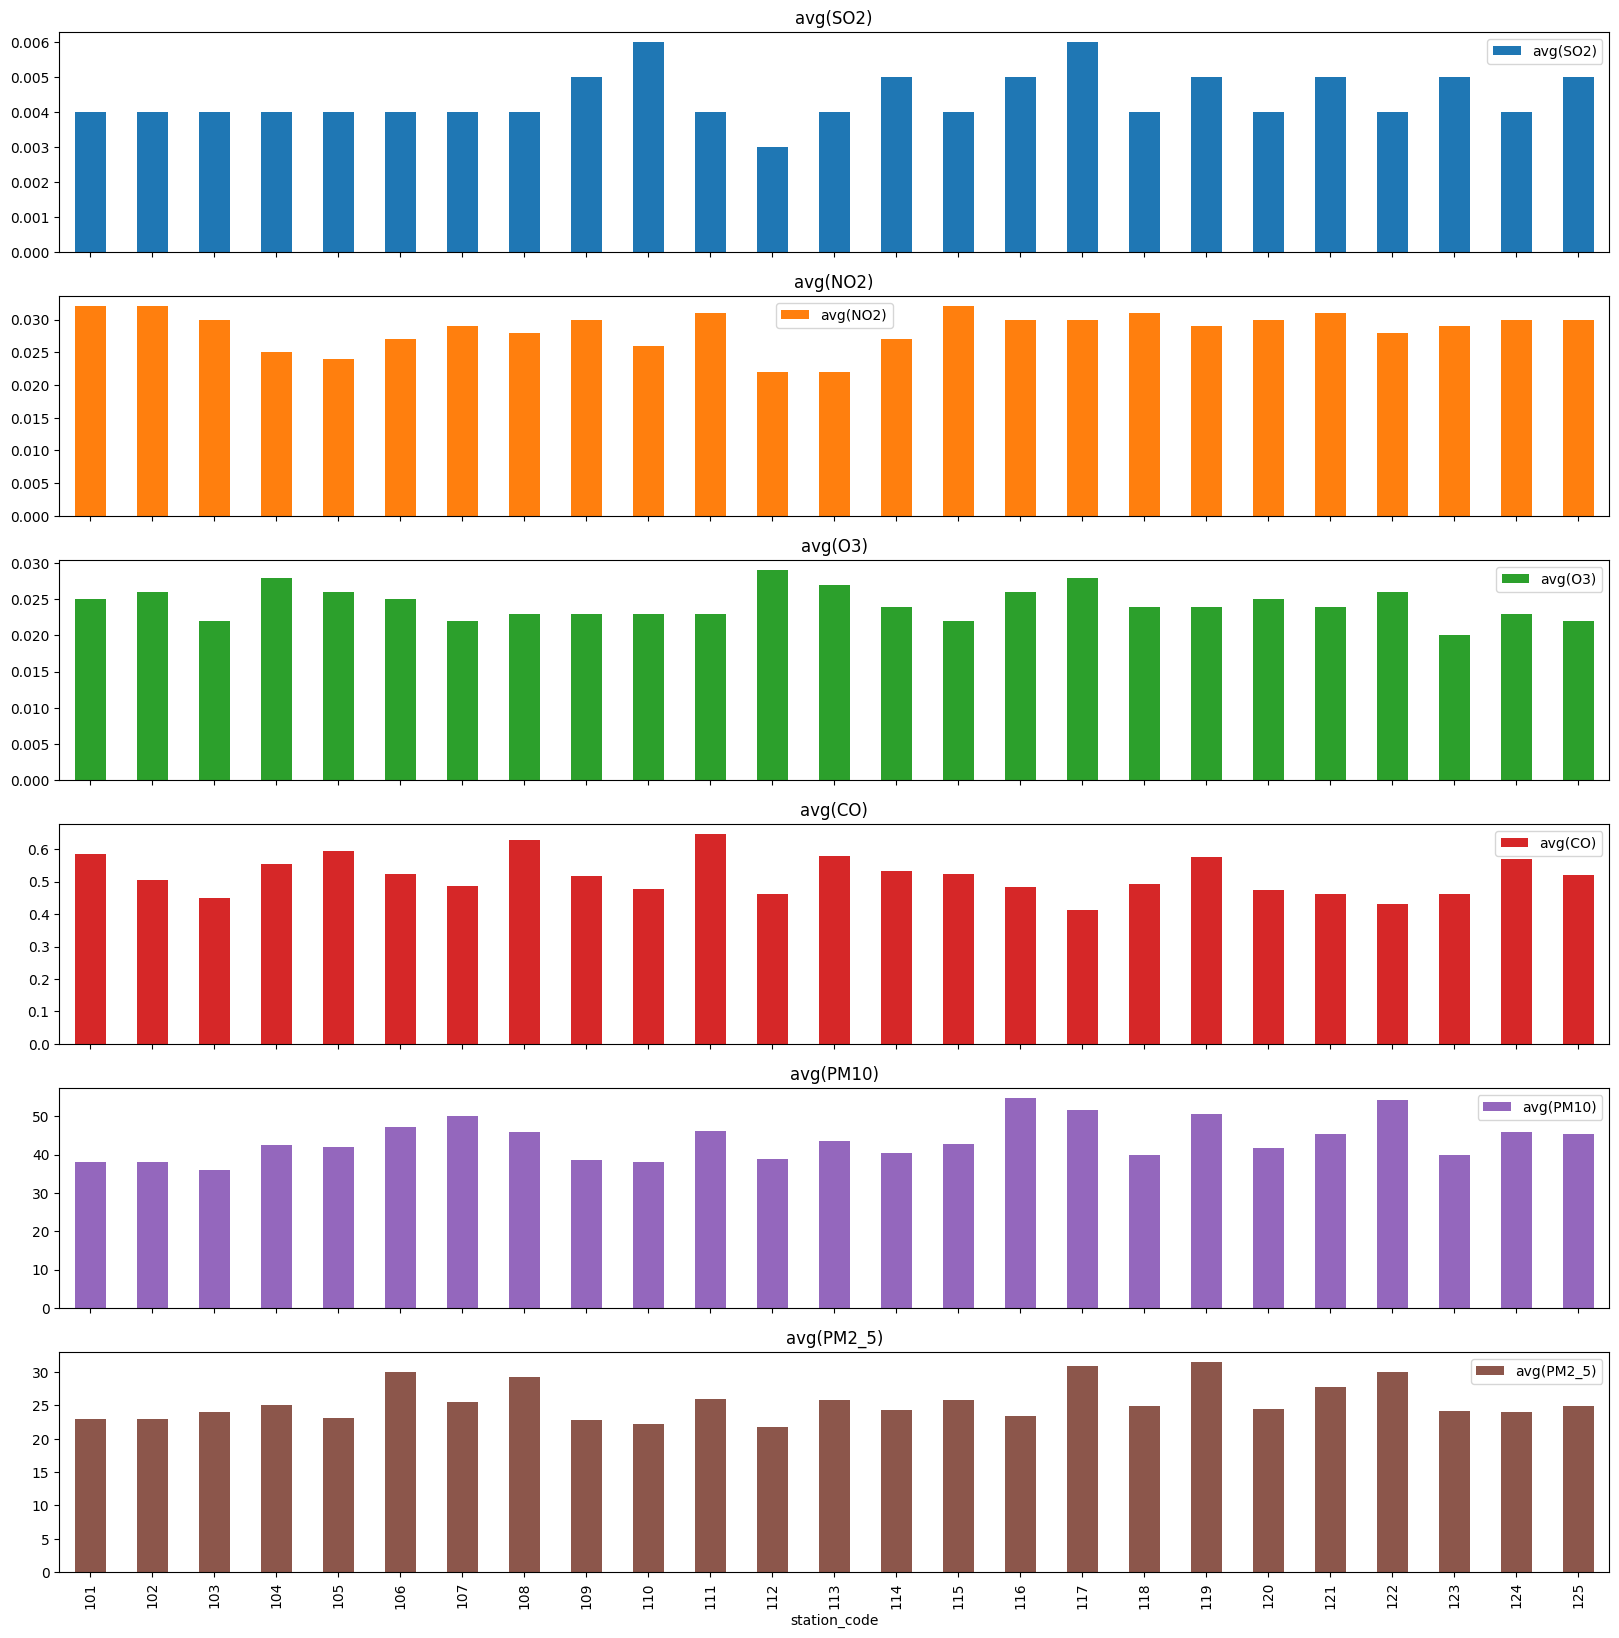

In [ ]:
df_avg_Pandas.plot.bar(stacked=True,figsize=(20,20),subplots=True)

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:175: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
<ipython-input-49-2d1a70d28550>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pandas_imputed_resampled = df_pandas_imputed.resample("M").mean()


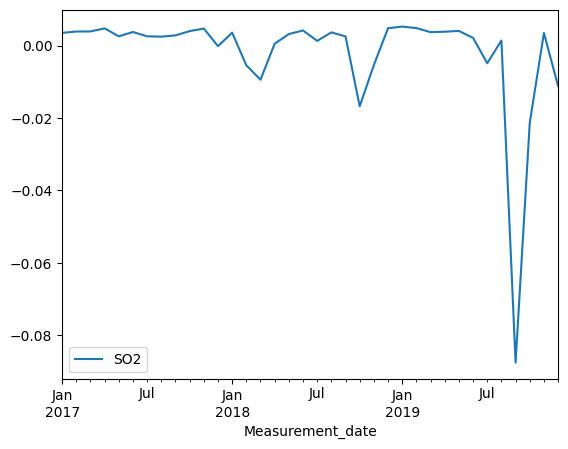

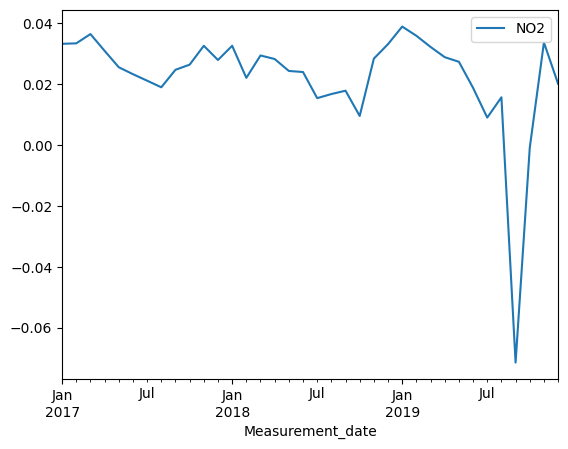

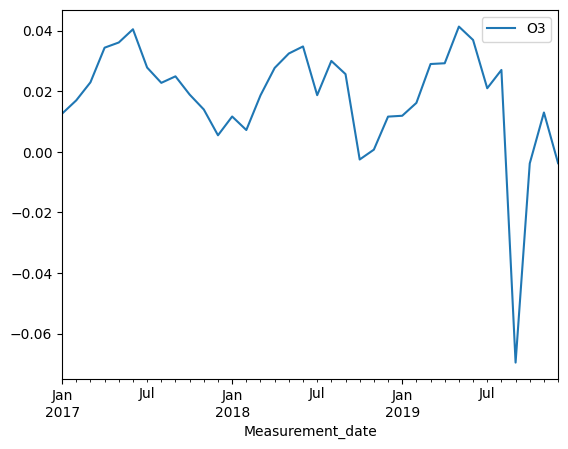

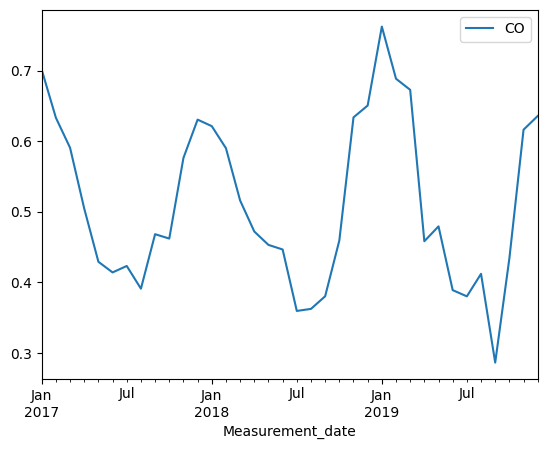

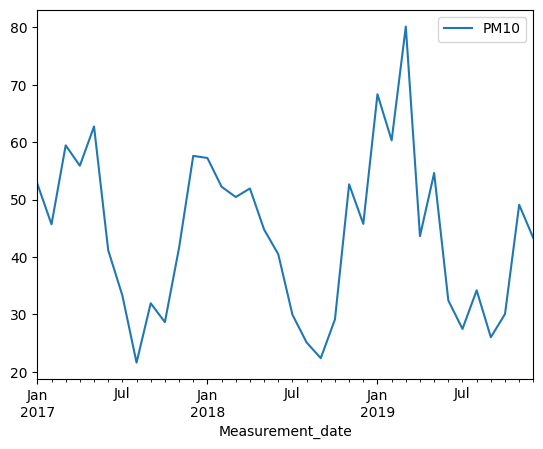

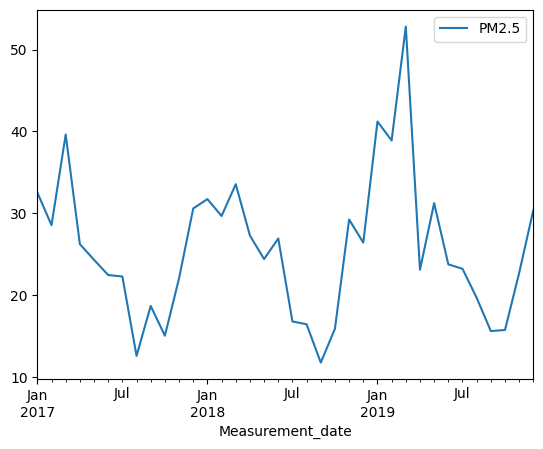

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming df is a Spark DataFrame with real data

df = spark.read.csv("/content/Measurement_summary.csv", header=True, inferSchema=True)

# Replace 'your_measurement_date_column' with the actual column name
df = df.withColumn('Measurement_date', col('Measurement date').cast('timestamp'))

# Convert Spark DataFrame to Pandas DataFrame
df_pandas_imputed = df.toPandas()

# Resample the Pandas DataFrame
df_pandas_imputed['Measurement_date'] = pd.to_datetime(df_pandas_imputed['Measurement_date'])
df_pandas_imputed.set_index('Measurement_date', inplace=True)
df_pandas_imputed_resampled = df_pandas_imputed.resample("M").mean()

# Define num_list (replace with your actual numerical column names)
num_list = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

# Plotting daily data
for i in num_list:
    df_pandas_imputed_resampled[i].plot(x="Measurement_date", subplots=True, legend=True)
    plt.show()


<ipython-input-50-08798c9e2027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)


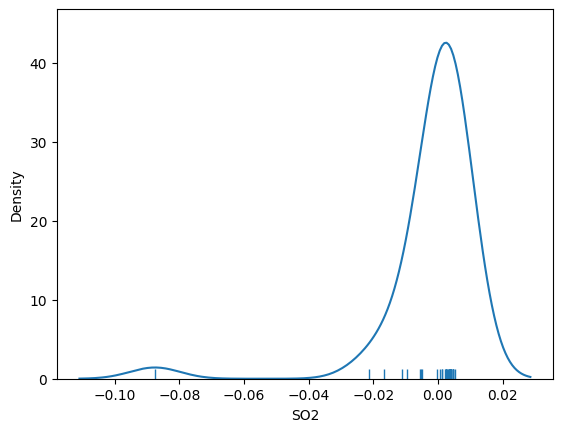

<ipython-input-50-08798c9e2027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)


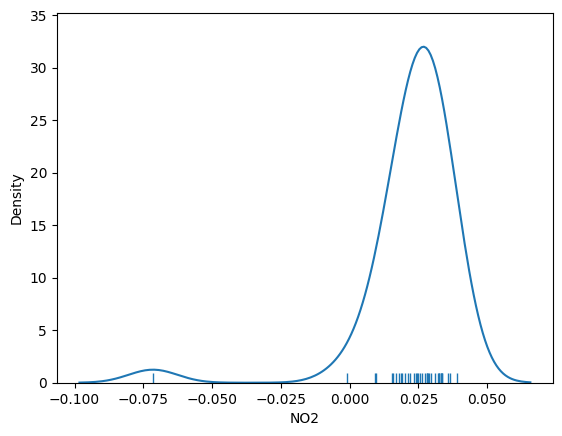

<ipython-input-50-08798c9e2027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)


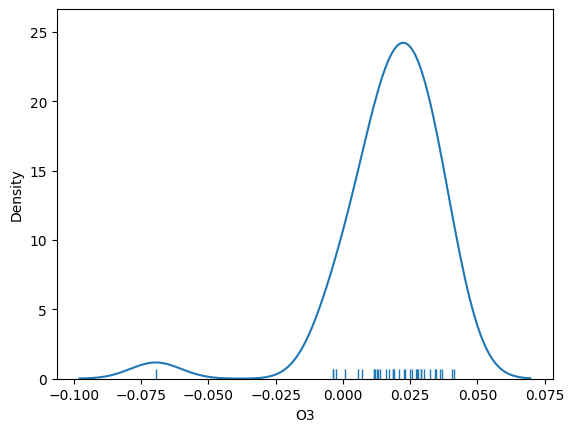

<ipython-input-50-08798c9e2027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)


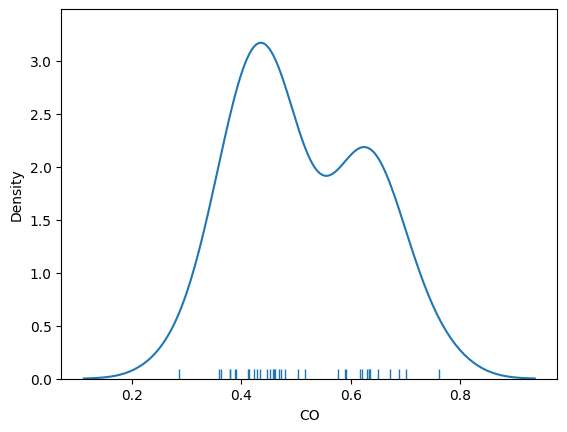

<ipython-input-50-08798c9e2027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)


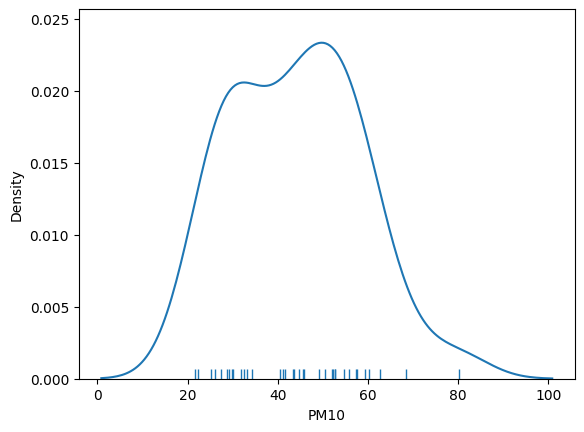

<ipython-input-50-08798c9e2027>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)


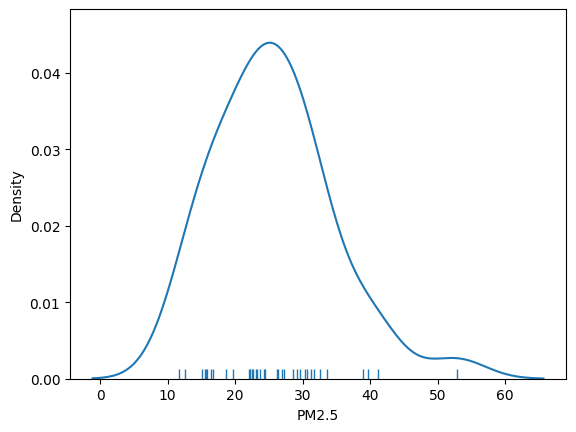

In [ ]:
for i in num_list:
  sns.distplot(df_pandas_imputed_resampled[i],hist=False,rug=True)
  plt.show()

In [ ]:
df_pandas_imputed_resampled.to_csv("Data_aftr_imputed.csv")



<Figure size 3000x3000 with 0 Axes>

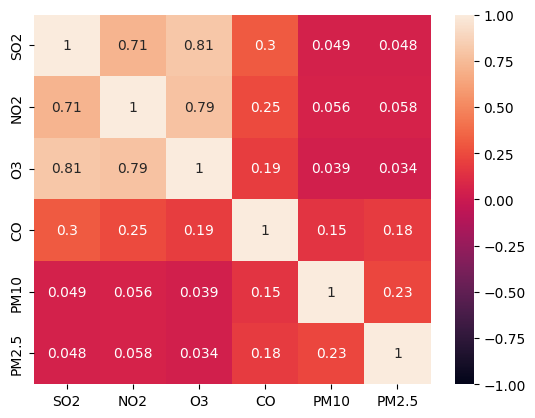

<Figure size 3000x3000 with 0 Axes>

In [ ]:
#heatmap
sns.heatmap(df_pandas_imputed[["SO2", "NO2", "O3", "CO", "PM10", "PM2.5"]].corr(),vmin=-1,annot=True)
plt.figure(figsize=(30,30))

In [ ]:
# #box_plots
# #PM2_5 Level by Stations
# sns.boxplot(x='Station code',y='PM2.5',data=df_pandas_imputed,showfliers=False)


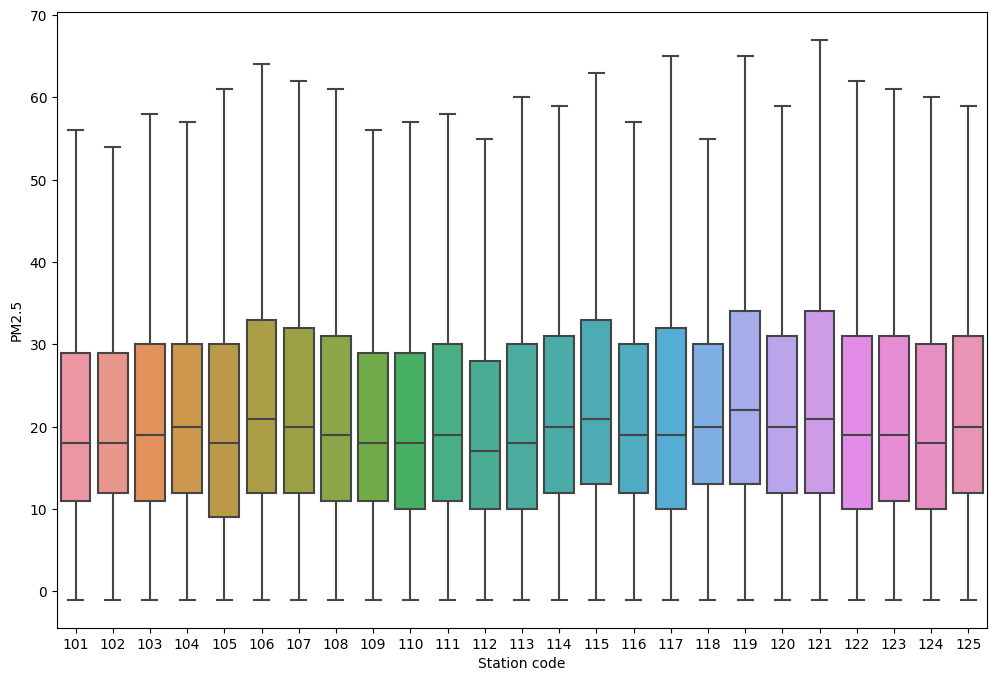

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot
sns.boxplot(x='Station code', y='PM2.5', data=df_pandas_imputed, showfliers=False)

# Display the plot
plt.show()

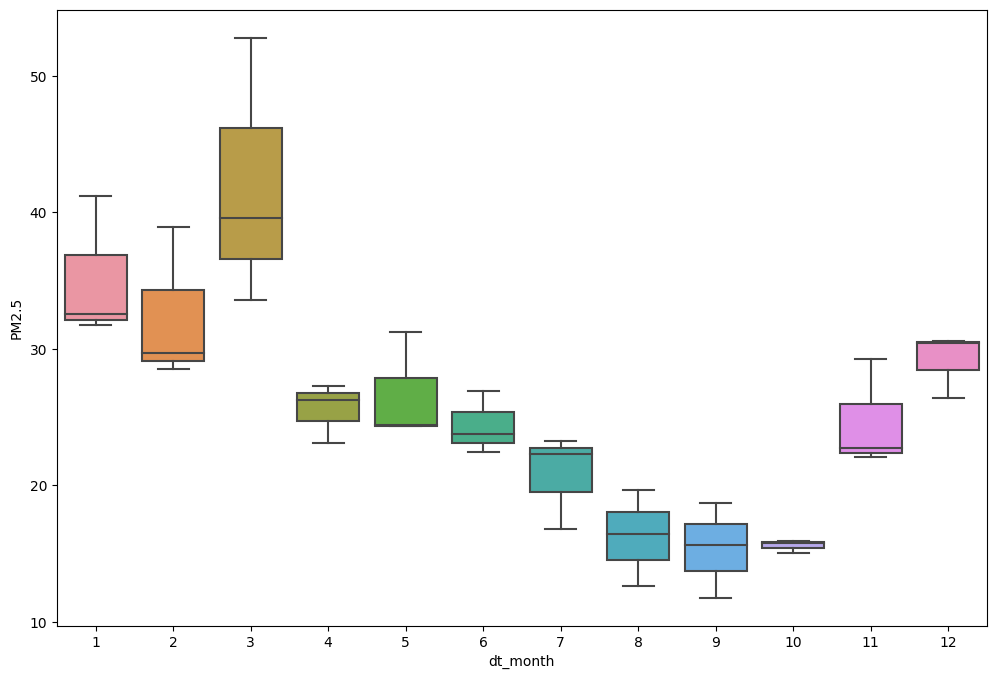

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(12, 8))
# Assuming 'Measurement_date' is the index after resampling
df_pandas_imputed_resampled['dt_month'] = df_pandas_imputed_resampled.index.month

# Plotting monthly boxplot for PM2.5
sns.boxplot(x='dt_month', y='PM2.5', data=df_pandas_imputed_resampled, showfliers=False)
plt.show()


<ipython-input-56-d11c1ef487d3>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pandas_WithTime.groupby(['dt_year', 'dt_month', 'Station code']).mean()['PM2.5'].unstack().plot(ax=ax)


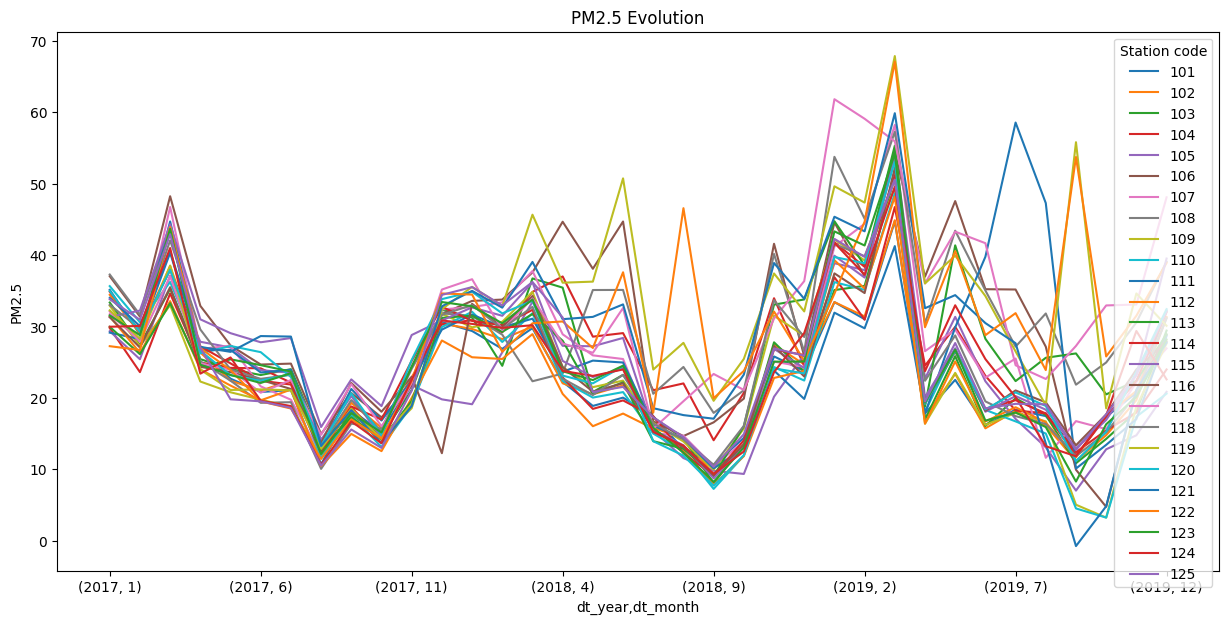

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from CSV
df_pandas_WithTime = pd.read_csv("Measurement_summary.csv")

# Convert 'Measurement date' to datetime
df_pandas_WithTime['Measurement date'] = pd.to_datetime(df_pandas_WithTime['Measurement date'])

# Extract year and month from 'Measurement date'
df_pandas_WithTime['dt_year'] = df_pandas_WithTime['Measurement date'].dt.year
df_pandas_WithTime['dt_month'] = df_pandas_WithTime['Measurement date'].dt.month

# Set 'Measurement date' as the index
df_pandas_WithTime.set_index('Measurement date', inplace=True)

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 7))
df_pandas_WithTime.groupby(['dt_year', 'dt_month', 'Station code']).mean()['PM2.5'].unstack().plot(ax=ax)

ax.set_ylabel("PM2.5")
ax.set_title("PM2.5 Evolution")
plt.show()


Available columns in DataFrame: Index(['Measurement date', 'Station code', 'Address', 'Latitude', 'Longitude',
       'SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'dt_year', 'dt_month',
       'dt_day', 'dt_dayofy', 'dt_hour', 'dt_week_no'],
      dtype='object')


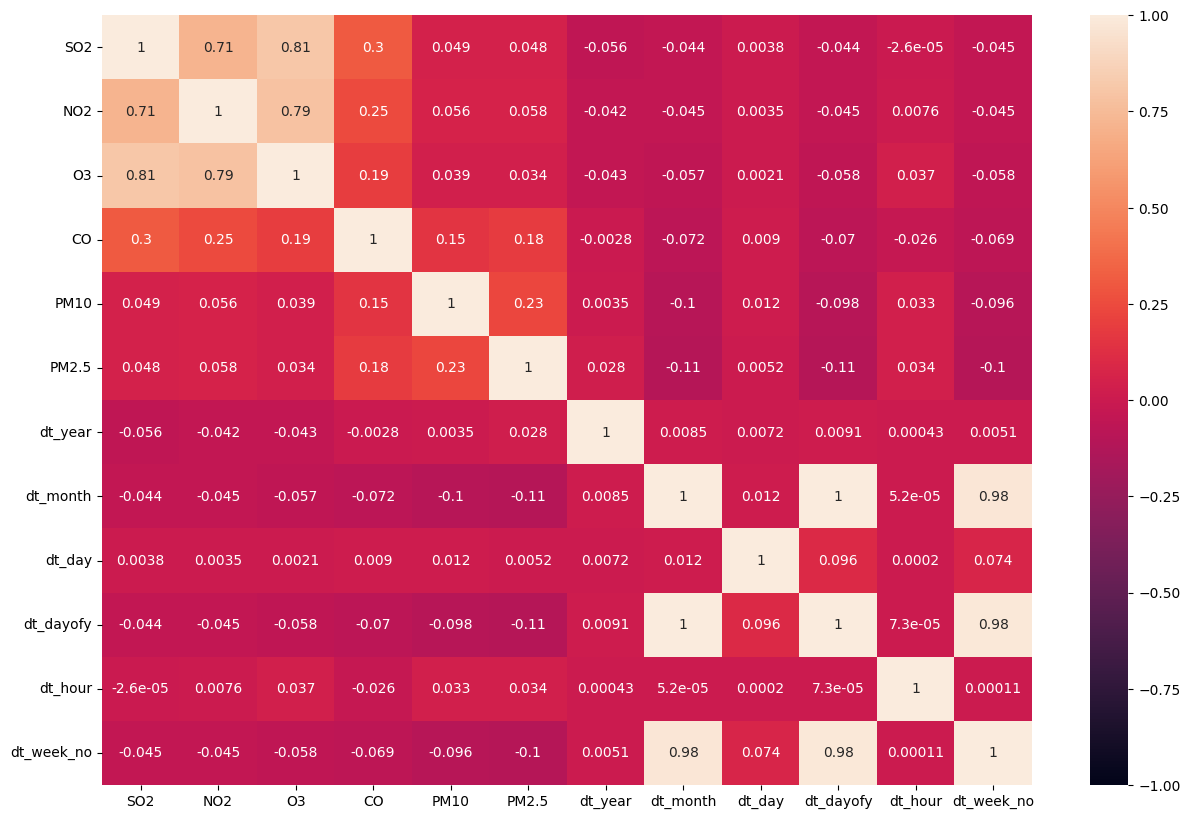

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load the DataFrame from CSV
df_pandas_WithTime = pd.read_csv("Measurement_summary.csv")

# Convert 'Measurement date' to datetime
df_pandas_WithTime['Measurement date'] = pd.to_datetime(df_pandas_WithTime['Measurement date'])

# Extract year, month, day, dayofyear, hour, and week number
df_pandas_WithTime['dt_year'] = df_pandas_WithTime['Measurement date'].dt.year
df_pandas_WithTime['dt_month'] = df_pandas_WithTime['Measurement date'].dt.month
df_pandas_WithTime['dt_day'] = df_pandas_WithTime['Measurement date'].dt.day
df_pandas_WithTime['dt_dayofy'] = df_pandas_WithTime['Measurement date'].dt.dayofyear
df_pandas_WithTime['dt_hour'] = df_pandas_WithTime['Measurement date'].dt.hour
df_pandas_WithTime['dt_week_no'] = df_pandas_WithTime['Measurement date'].dt.isocalendar().week

# Columns for correlation heatmap
columns_for_heatmap = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5',

                       'dt_year', 'dt_month', 'dt_day', 'dt_dayofy', 'dt_hour', 'dt_week_no']

# Print column names for inspection
print("Available columns in DataFrame:", df_pandas_WithTime.columns)

# Filter the DataFrame to include only the selected columns
df_heatmap = df_pandas_WithTime[columns_for_heatmap]

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap.corr(), vmin=-1, annot=True)
plt.show()


In [ ]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

windowSpec = Window.partitionBy('`Station code`').orderBy('Measurement_date')

# 1h Lag
df_lag = df.withColumn('prev_hour_PM2_5', F.lag(df['`PM2.5`']).over(windowSpec))

# 2h Lag
df_lag = df_lag.withColumn('prev_2hour_PM2_5',
                           F.lag(df_lag['prev_hour_PM2_5']).over(windowSpec))

# 3h Lag window
df_lag = df_lag.withColumn('prev_3hour_PM2_5',
                           F.lag(df_lag['prev_hour_PM2_5']).over(windowSpec))


In [ ]:
#rolling average column creation #adjusted to work based on this solution
#by converting workdays to seconds and casting timestamps to "long"
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Functions to calculate number of seconds from number of days
days = lambda i: i * 86400

# Create window by casting timestamp to long (number of seconds)
# Partition by station code
windowSpec = Window.partitionBy('`Station code`')\
                    .orderBy(F.col('Measurement_date').cast('long'))\
                    .rangeBetween(-days(7), 0)

# 1day Rolling Mean
df_lag = df_lag.withColumn('Roll_avg24h_PM2_5', F.avg(df_lag['`PM2.5`']).over(windowSpec))

# 3h Rolling Mean
windowSpec2 = Window.partitionBy('`Station code`')\
                    .orderBy(F.col('Measurement_date'))\
                    .rowsBetween(-2, 0)

df_lag = df_lag.withColumn('Roll_avg3h_PM2_5', F.avg(df_lag['`PM2.5`']).over(windowSpec2))

# 2h Rolling Mean
windowSpec3 = Window.partitionBy('`Station code`')\
                    .orderBy(F.col('Measurement_date'))\
                    .rowsBetween(-1, 0)

df_lag = df_lag.withColumn('Roll_avg2h_PM2_5', F.avg(df_lag['`PM2.5`']).over(windowSpec3))

# Show the resulting DataFrame
df_lag.show()


+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+---------------+----------------+----------------+------------------+------------------+----------------+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|   Measurement_date|prev_hour_PM2_5|prev_2hour_PM2_5|prev_3hour_PM2_5| Roll_avg24h_PM2_5|  Roll_avg3h_PM2_5|Roll_avg2h_PM2_5|
+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+---------------+----------------+----------------+------------------+------------------+----------------+
|2017-01-01 00:00|         108|571, Gwangnaru-ro...|37.5471803|127.0924929|0.004|               0.045|               0.003|0.8|68.0| 63.0|2017-01-01 00:00:00|           null|            null|            null|

In [ ]:
#Building PipeLine
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import PCA

In [ ]:
categorical_col = ['Station_code',#'Latitude','Longitude'
                   'O3_Q_SK',
                   'CO_Q_SK',
                   'prev_PM2_5_Q_SK',
                   'dt_year',
                   'dt_day',
                   'dt_dayofy',
                   'dt_hour',
                   ]

In [ ]:
num_col=[
    'CO',
    'PM10',
    'prev_hour_PM2_5',
    'prev_2hour_PM2_5',
    'Roll_avg24h_PM2_5',
    'Roll_avg3h_PM2_5',
    'Roll_avg2h_PM2_5'
]
# #index categorical columns
# indexers=[StringIndexer(inputCol=c,outputCol="{0}_indexed".format(c),
#                         handleInvalid='error') for c in categorical_col]
# #encode indexed columns
# encoders = [OneHotEncoder(droplast=True,inputCol=indexer.getOutputCol(),
#                           outputCol="{0}_encoded".format(indexer.getOutputCol())) for indexer in indexers]
# #Assemble feature together
# assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders]
#                             +num_col,outputCol='Features')
# #return top 10 principal components
# #building pipeline
# pipeline = Pipeline(stages = indexers+encoders+ [assembler])

In [ ]:
# from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
# from pyspark.ml import Pipeline

# Define the categorical columns
categorical_col = [
    'CO',
    'PM10',
    'prev_hour_PM2_5',
    'prev_2hour_PM2_5',
    'Roll_avg24h_PM2_5',
    'Roll_avg3h_PM2_5',
    'Roll_avg2h_PM2_5'
]

# Index categorical columns
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c), handleInvalid='error') for c in categorical_col]

# Encode indexed columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol()), dropLast=True) for indexer in indexers]

# Assemble features together
num_col = []  # Assuming you have a list of numerical column names
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + num_col, outputCol='Features')

# Build the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Now we fit and transform your data using the pipeline


In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import PipelineModel

#  defined the categorical_col, num_col, and df_lag

# Index categorical columns
indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c), handleInvalid='skip') for c in categorical_col]

# Encode indexed columns
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol()), dropLast=True) for indexer in indexers]

# Assemble features together
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + num_col, outputCol='Features')

# Build the pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Fit the pipeline on  DataFrame
model = pipeline.fit(df_lag)

# Transform the DataFrame
final_dataset = model.transform(df_lag)

# Save the model for future use
model.save("Models")

# If you need to load the model later
loaded_model = PipelineModel.load("Models")

# Transform the DataFrame using the loaded model
final_dataset_loaded = loaded_model.transform(df_lag)

# Show the resulting DataFrame
final_dataset.show()


+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+---------------+----------------+----------------+------------------+------------------+----------------+----------+------------+-----------------------+------------------------+-------------------------+------------------------+------------------------+------------------+--------------------+-------------------------------+--------------------------------+---------------------------------+--------------------------------+--------------------------------+--------------------+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|   Measurement_date|prev_hour_PM2_5|prev_2hour_PM2_5|prev_3hour_PM2_5| Roll_avg24h_PM2_5|  Roll_avg3h_PM2_5|Roll_avg2h_PM2_5|CO_indexed|PM10_indexed|prev_hour_PM2_5_indexed|prev_2hour_PM2_5_indexed|Roll_avg24h_PM2_5_indexed

In [ ]:
from pyspark.sql.functions import log1p, col

target = '`PM2.5`'

# Filter data for training and testing
X_train = final_dataset.filter(col('Measurement_date').between("2017-01-01", "2018-12-31"))
X_test = final_dataset.filter(col('Measurement_date') > "2018-12-31")

# Apply log transformation to the target column
X_train = X_train.withColumn(target, log1p(col(target)))
X_test = X_test.withColumn(target, log1p(col(target)))

In [ ]:
# gbt = GBTRegressor(featuresCol='Features',labelCol=target)
# dt=DecisionTreeRegressor(featuresCol='Features',labelCol=target)
# lr=LinearRegression(featuresCol='Features',labelCol=target)
# rf=RandomForestRegressor(featuresCol='Features',labelCol=target)

In [ ]:
# # # # #GBTRegressor
# fitted=gbt.fit(X_train)


In [ ]:
# #gbt reggressor output
# Output=(fitted_transform(X_test)
#       .withColumn("prediction",F.expm1(F.col("prediction")))
#       .withColumn(target,F.expm1(F.col(target)))

In [ ]:
# #decision Tree Results
# eval_ = RegressionEvaluator(labelCol=target,predictionCol="prediction",metricName='rmse")
# rmse=eval_.evaluate(Output_DT)
# print('rmse is %.2f',%rmse)
# mae = eval_.evaluate(Output_DT,{eval_metricName:"mae"})
# print{'mae is %.2f'%mae}
# r2=eval_.evaluate(Output_DT,{eval_.metricName:"r2")
# print('r2 is %.2f' %r2)

In [ ]:
# #GBT regressor Output
# eval_ = RegressorEvaluator(labelCol=target,predictionCol="prediction",metricName='rmse')
# rmse = eval_.evaluate(Output)
# #round 3
# mae = eval_.evaluate(Output,{eval_.metricName:"mae"})
# print('mae is %.2f',%mae)
# r2 = eval_.evaluate(Output,{eval_.metricName:"r2"})
# print('r2 is %.2f' %r2)


In [ ]:
# #randomforest regressor Output
# eval_ =RegressionEvaluator(labelCol=target,predictionCol="prediction",metricName="rmse")
# rmse=eval_.evaluate(Output_RF,{eval_.metricName:"mae"})
# print('mae is %.2f' %mae)
# r2=eval_.evaluate(Output_RF,{eval_.metricName:"r2"})
# print('r2 is %.2f',%r2)


In [ ]:
#appendix -A
df.groupBy('Address').count().sort("count",asscending=False).show(25)

+--------------------+-----+
|             Address|count|
+--------------------+-----+
|32, Segeomjeong-r...|25890|
|18, Ttukseom-ro 3...|25891|
|34, Sirubong-ro 2...|25892|
|49, Samyang-ro 13...|25892|
|45, Gamasan-ro 27...|25892|
|6, Sadang-ro 16a-...|25894|
|11, Yangsan-ro 23...|25894|
|571, Gwangnaru-ro...|25894|
|215, Jinheung-ro,...|25896|
|59, Gucheonmyeon-...|25904|
|20, Geumha-ro 21-...|25904|
|426, Hakdong-ro, ...|25904|
|56, Jungang-ro 52...|25904|
|43, Cheonho-daero...|25904|
|136, Hannam-daero...|25904|
|14, Sillimdong-gi...|25905|
|10, Poeun-ro 6-gi...|25905|
|70, Samyang-ro 2-...|25905|
|16, Sinbanpo-ro 1...|25905|
|236, Baekjegobun-...|25905|
|19, Jong-ro 35ga-...|25905|
|15, Deoksugung-gi...|25905|
|17, Sanggye-ro 23...|25905|
|369, Yongmasan-ro...|25906|
|71, Gangseo-ro 45...|25906|
+--------------------+-----+



In [ ]:
df7=df.toPandas()['Address'].unique() #https://arrow.apache.org/docs/python/pandas.html
df7

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:175: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


array(['19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea',
       '15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea',
       '136, Hannam-daero, Yongsan-gu, Seoul, Republic of Korea',
       '215, Jinheung-ro, Eunpyeong-gu, Seoul, Republic of Korea',
       '32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul, Republic of Korea',
       '10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea',
       '18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Republic of Korea',
       '571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republic of Korea',
       '43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul, Republic of Korea',
       '369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea',
       '70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea',
       '49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Republic of Korea',
       '34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Republic of Korea',
       '17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea',
       '56, Jungang-ro 52-gil, Yangc

In [ ]:
#orderColumn
cols=['Station code','Measurement_date']
df.orderBy(cols,ascending=True).show()

+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|   Measurement_date|
+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+
|2017-01-01 00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.059|               0.002|1.2|73.0| 57.0|2017-01-01 00:00:00|
|2017-01-01 01:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.058|               0.002|1.2|71.0| 59.0|2017-01-01 01:00:00|
|2017-01-01 02:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.056|               0.002|1.2|70.0| 59.0|2017-01-01 02:00:00|
|2017-01-01 03:00|         101|19, Jong-ro 35g

In [ ]:
#appendix -c #calendarHitmapPlotting
#https://vietle.info/post/calendarhitmap-python/
#created timeseries 'MASK'
from pyspark.sql.functions import sequence,to_date,explode,col
#https://stackoverflow.com/questions/43141671/sparksql-on-pyspark-how-to-generate-time-series
#created_timeseries=spark.sql("SELECT sequence(to_timestamp('2017-01-01 00:00),interval 1 hour) as Measurement_date).withColumn("Measurement_date",expl)")
created_timeseries = spark.sql("""
    SELECT
        explode(sequence(to_timestamp('2017-01-01 00:00'), to_timestamp('2017-01-02 00:00'), interval 1 hour)) as Measurement_date
""")

# Show the created timeseries
created_timeseries.show(50)


+-------------------+
|   Measurement_date|
+-------------------+
|2017-01-01 00:00:00|
|2017-01-01 01:00:00|
|2017-01-01 02:00:00|
|2017-01-01 03:00:00|
|2017-01-01 04:00:00|
|2017-01-01 05:00:00|
|2017-01-01 06:00:00|
|2017-01-01 07:00:00|
|2017-01-01 08:00:00|
|2017-01-01 09:00:00|
|2017-01-01 10:00:00|
|2017-01-01 11:00:00|
|2017-01-01 12:00:00|
|2017-01-01 13:00:00|
|2017-01-01 14:00:00|
|2017-01-01 15:00:00|
|2017-01-01 16:00:00|
|2017-01-01 17:00:00|
|2017-01-01 18:00:00|
|2017-01-01 19:00:00|
|2017-01-01 20:00:00|
|2017-01-01 21:00:00|
|2017-01-01 22:00:00|
|2017-01-01 23:00:00|
|2017-01-02 00:00:00|
+-------------------+



In [ ]:
#merge DataFrames
###outerjoin in pyspark-all values
DF_with_missing_timestamps=df.join(created_timeseries,on=['Measurement_date'],how='outer')
DF_with_missing_timestamps.show()
#https://danvatterott.com/blog/2018/02/06/is-not-in-with-pyspark/
#https://forums.databricks.com/questions/876/is-there-a-better-method-to-join-two-dataframes-an.html

+-------------------+----------------+------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+---+----+-----+
|   Measurement_date|Measurement date|Station code|             Address|          Latitude|         Longitude|                 SO2|                 NO2|                  O3| CO|PM10|PM2.5|
+-------------------+----------------+------------+--------------------+------------------+------------------+--------------------+--------------------+--------------------+---+----+-----+
|2017-01-05 01:00:00|2017-01-05 01:00|         101|19, Jong-ro 35ga-...|        37.5720164|       127.0050075|               0.004|               0.055|               0.002|0.9|50.0| 32.0|
|2017-01-05 01:00:00|2017-01-05 01:00|         102|15, Deoksugung-gi...|        37.5642629|       126.9746757|               0.004|                0.06|               0.002|1.0|51.0| 36.0|
|2017-01-05 01:00:00|2017-01-05 01:00|         103|136,

In [ ]:
Pandas_df_with_missing_time=DF_with_missing_timestamps.toPandas()

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:175: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [ ]:
Pandas_df_with_missing_time.set_index("Measurement_date",inplace=True)

In [ ]:
Pandas_df_with_missing_time.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
Measurement_date,,,,,,,,,,,
2017-01-05 01:00:00,2017-01-05 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.055,0.002,0.9,50.0,32.0
2017-01-05 01:00:00,2017-01-05 01:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.004,0.060,0.002,1.0,51.0,36.0
2017-01-05 01:00:00,2017-01-05 01:00,103,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850,0.005,0.047,0.001,0.9,45.0,36.0
2017-01-05 01:00:00,2017-01-05 01:00,104,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848,0.004,0.018,0.004,0.8,51.0,27.0
2017-01-05 01:00:00,2017-01-05 01:00,105,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679,0.005,0.040,0.007,0.9,57.0,33.0


In [ ]:
Pandas_df_with_missing_time.index = pd.to_datetime(Pandas_df_with_missing_time.index)
Grouped = Pandas_df_with_missing_time.groupby("Measurement_date").mean()

<ipython-input-80-a8b5510504aa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Grouped = Pandas_df_with_missing_time.groupby("Measurement_date").mean()


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming cal is your grouped DataFrame
# cal = {'2017':Grouped[Grouped.index.year==2017],'2018':Grouped[Grouped.index.year==2018],'2019':Grouped[Grouped.index.year==2019]}
# # Define Ticks
# DAYS = ['SUN', 'MON', 'TUES', 'WED', 'THURS', 'FRI', 'SAT']
# MONTHS = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
# fig,ax=plt.subplots(3,1,figsize=(20,6))
# fig.suptitle("Fine particles in SEOUL CITY_SK",fontweight='bold',fontsize=25)

# plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=0.5)

# # Plot for each year
# for i, val in enumerate(['2017', '2018', '2019']):
#     start = cal.get(val).index.min()
#     end = cal.get(val).index.max()
#     start_sun=start - np.timedelta64((start.dayofweek+1) % 7,'D')
#     end_sun = end + np.timedelta64((7 - end.dayofweek - 1),'D')
#     num_weeks = (end_sun - start_sun).days//7
#     heatmap=np.full([7,num_weeks],np.nan)
#     ticks ={}

#     y=np.arange(8)-0.5
#     x=np.arange(num_weeks+1)-0.5
# for week in range(num_weeks):
#     start = cal.get(val).index.min()
#     end = cal.get(val).index.max()
#     start_sun = start-np.timedelta64((start.dayofweek + 1) % 7, 'D')
#     end_sun = end + np.timedelta64(7- end.dayofweek -1, 'D')
#     num_weeks=(end_sun - start_sun).days // 7
#     heatmap = np.full([7, num_weeks], np.nan)
#     ticks = {}
#     y = np.arange(8) - 0.5
#     X = np.arange(num_weeks + 1)-0.5
# for week in range (num_weeks):
#     for day in range(7):
#         date = start_sun + np.timedelta64(7* week + day, 'D')
#     if date.day == 1:
#        ticks[week] = MONTHS [date.month-1]
#     if date.dayofyear ==1:
#        ticks [week] += f'\n{date.year}'
#     if start <= date < end:
#        heatmap[day, week]= cal.get(val).loc[date, 'PM2.5']
# mesh = ax[i].pcolormesh(x, y, heatmap, cmap = 'jet', edgecolors = 'grey')

# ax[i].invert_yaxis()
# # Set the ticks.
# ax[i].set_xticks(list(ticks.keys()))
# ax[i].set_xticklabels (list(ticks.values()))
# ax[i].set_yticks(np.arange(7))
# ax[i].set_yticklabels (DAYS)
# ax[i].set_ylim(6.5,-0.5)
# ax[i].set_aspect('equal')
# ax[i].set_title(val, fontsize=15)

# # Hatch for out of bound values in a year
# ax[i].patch.set (hatch='xx', edgecolor="black")

# # Add color bar at the bottom
# cbar_ax = fig.add_axes([0.25, -0.10, 0.5, 0.05])
# fig.colorbar (mesh, orientation="horizontal", pad=0.2, cax= cbar_ax)
# colorbar=ax[1].collections[0].colorbar




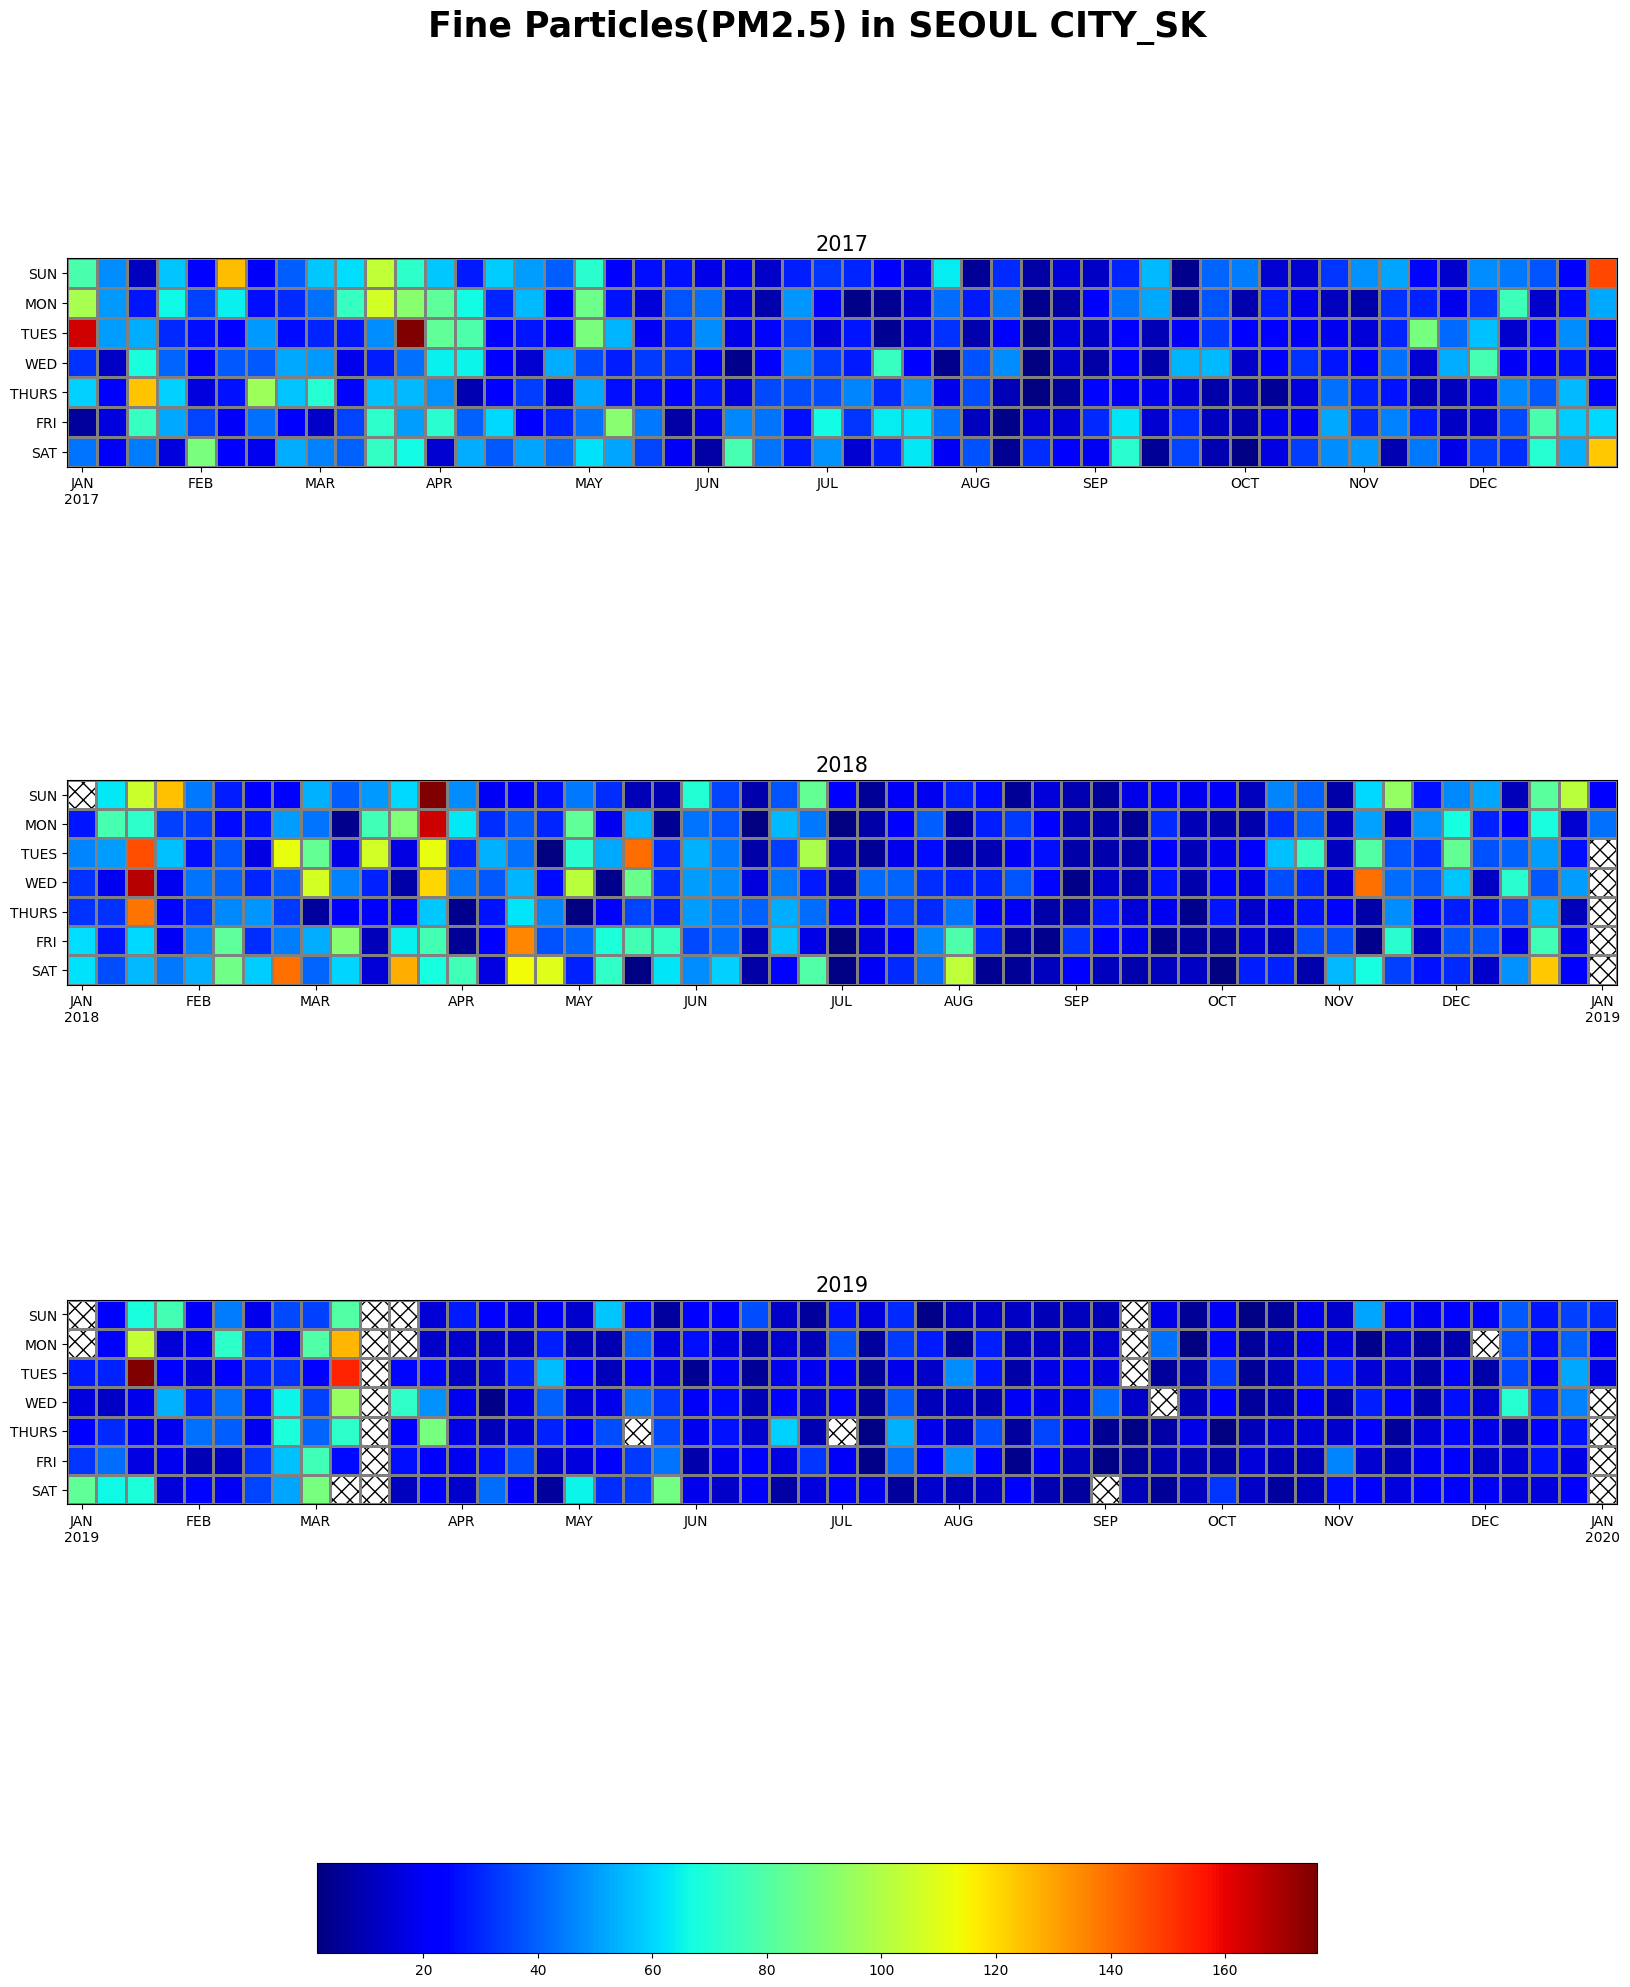

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming cal is your grouped DataFrame
cal = {'2017': Grouped[Grouped.index.year == 2017],
       '2018': Grouped[Grouped.index.year == 2018],
       '2019': Grouped[Grouped.index.year == 2019]}

# Define Ticks
DAYS = ['SUN', 'MON', 'TUES', 'WED', 'THURS', 'FRI', 'SAT']
MONTHS = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

fig, axs = plt.subplots(3, 1, figsize=(20, 18))
fig.suptitle("Fine Particles(PM2.5) in SEOUL CITY_SK", fontweight='bold', fontsize=25)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

for i, val in enumerate(['2017', '2018', '2019']):
    start = cal[val].index.min()
    end = cal[val].index.max()
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64((7 - end.dayofweek - 1), 'D')
    num_weeks = int((end_sun - start_sun).days // 7)
    heatmap = np.full([7, num_weeks], np.nan)
    ticks = {}

    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                try:
                    heatmap[day, week] = cal[val].loc[date, 'PM2.5']
                except KeyError:
                    pass

    mesh = axs[i].pcolormesh(x, y, heatmap, cmap='jet', edgecolors='grey')
    axs[i].invert_yaxis()
    axs[i].set_xticks(list(ticks.keys()))
    axs[i].set_xticklabels(list(ticks.values()))
    axs[i].set_yticks(np.arange(7))
    axs[i].set_yticklabels(DAYS)
    axs[i].set_ylim(6.5, -0.5)
    axs[i].set_aspect('equal')
    axs[i].set_title(val, fontsize=15)
    axs[i].patch.set(hatch='xx', edgecolor="black")

# Add color bar at the bottom
cbar_ax = fig.add_axes([0.25, -0.10, 0.5, 0.05])
fig.colorbar(mesh, orientation="horizontal", pad=0.2, cax=cbar_ax)
colorbar = axs[1].collections[0].colorbar

plt.show()


In [ ]:

df.dtypes

[('Measurement date', 'string'),
 ('Station code', 'int'),
 ('Address', 'string'),
 ('Latitude', 'double'),
 ('Longitude', 'double'),
 ('SO2', 'double'),
 ('NO2', 'double'),
 ('O3', 'double'),
 ('CO', 'double'),
 ('PM10', 'double'),
 ('PM2.5', 'double'),
 ('Measurement_date', 'timestamp')]

In [ ]:
df_pandas_imputed.describe()#high std shows the need of scaling,negative values issues with sensors and potential outliers

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
count,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000,647511.000000
mean,113.000221,37.553484,126.989340,-0.001795,0.022519,0.017979,0.509197,43.708051,25.411995
std,7.211315,0.053273,0.078790,0.078832,0.115153,0.099308,0.405319,71.137342,43.924595
min,101.000000,37.452357,126.835151,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,107.000000,37.517528,126.927102,0.003000,0.016000,0.008000,0.300000,22.000000,11.000000
50%,113.000000,37.544962,127.004850,0.004000,0.025000,0.021000,0.500000,35.000000,19.000000
75%,119.000000,37.584848,127.047470,0.005000,0.038000,0.034000,0.600000,53.000000,31.000000
max,125.000000,37.658774,127.136792,3.736000,38.445000,33.600000,71.700000,3586.000000,6256.000000


In [ ]:
#appendix E- Hourly Data
#DistributionPlots
import seaborn as sns
#convert from spark to pandas
# df_pandas_imputed = df_pandas.toPandas().set_index("Measurement_date")

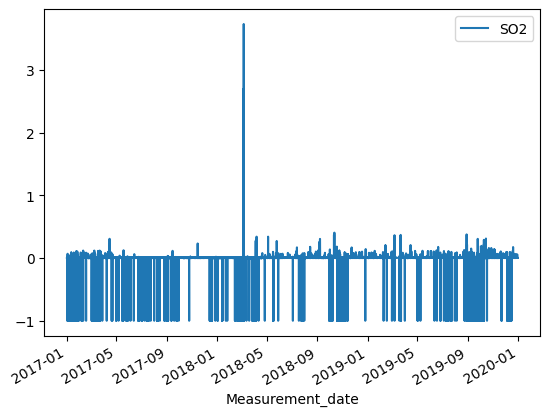

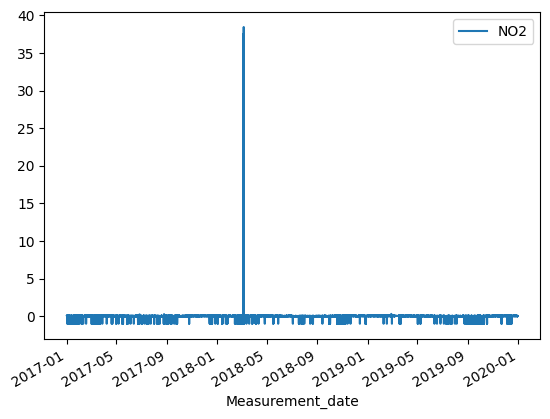

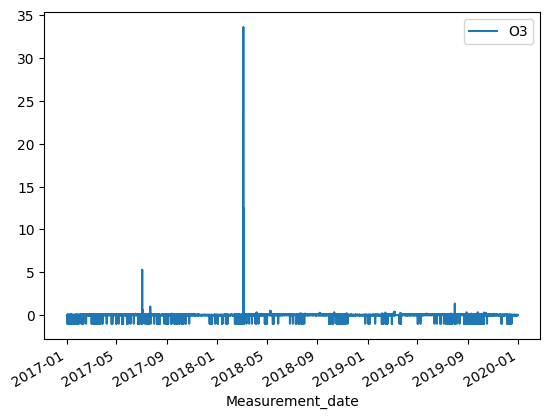

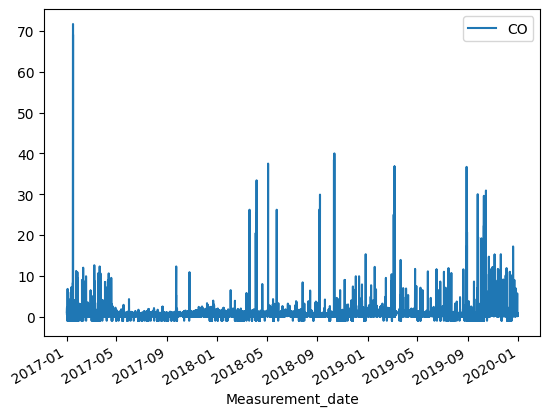

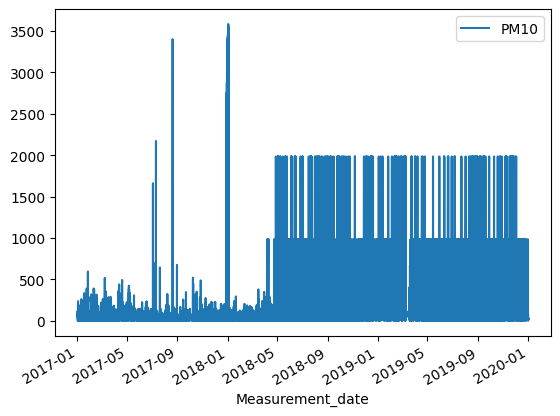

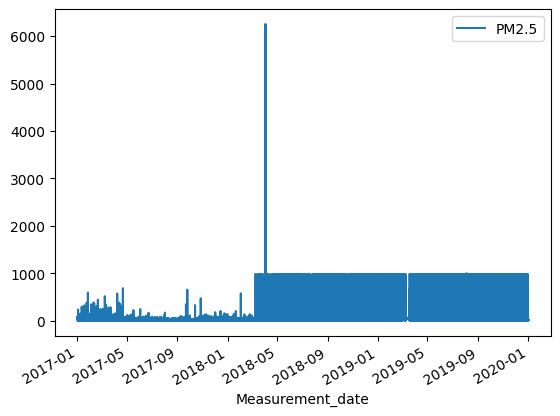

In [ ]:
#plotting hourly data
for i in num_list:
    df_pandas_imputed[i].plot(x="Measurement_date",subplots=True,legend=True)
    plt.show()

<ipython-input-87-d3470f2015bd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pandas_imputed_monthly = df_pandas_imputed.resample("M").mean()


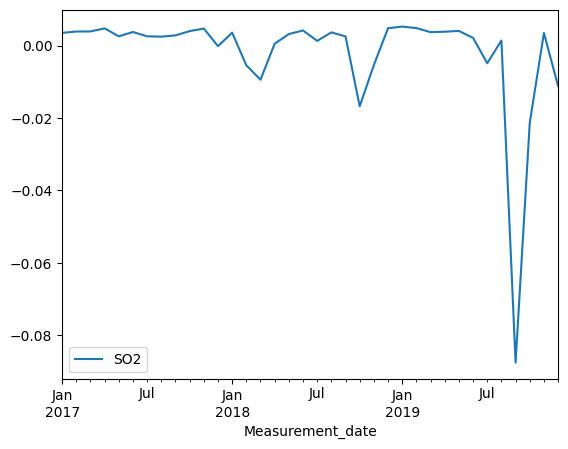

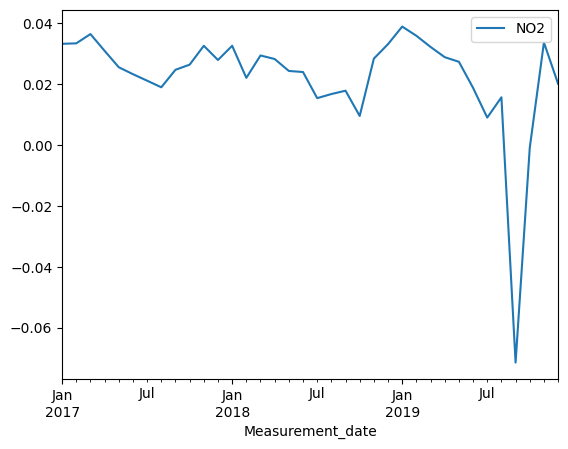

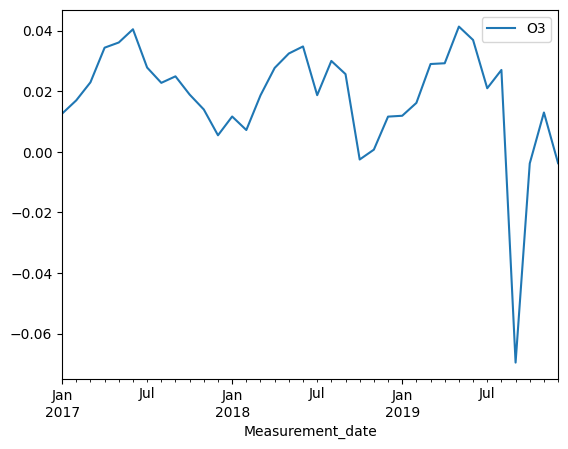

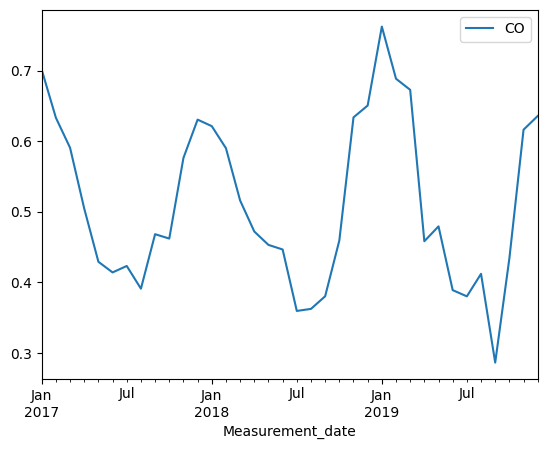

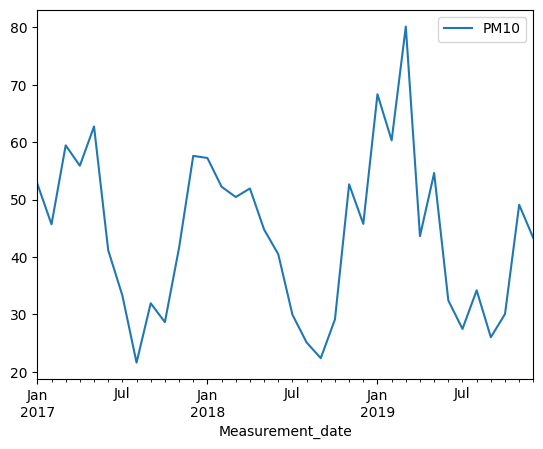

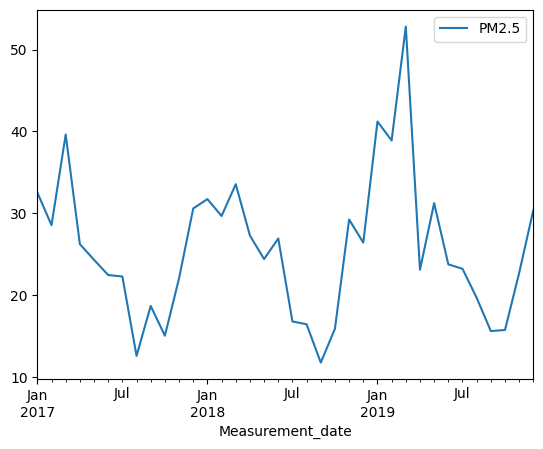

In [ ]:
#appendix F- Resampled monthly data
df_pandas_imputed_monthly = df_pandas_imputed.resample("M").mean()
#ploting daily data
for i in num_list:
    df_pandas_imputed_monthly[i].plot(x="Measurement_date",subplots= True,legend=True)
    plt.show()

In [ ]:
#Appendix G- Categorical Air Quality
from pyspark.sql import functions as F
#SouthKorean boundaries for air quality
dataDF=df.withColumn("SO2_Q_SK",
                      when((col("SO2")<=0.02),"Good")
                     .when((col("SO2")>0.02)&(col("SO2")<=0.05),"Normal")
                     .when((col("SO2")>0.05)&(col("SO2")<=0.15),"Bad")
                     .when((col("SO2")>0.15)&(col("SO2")<=1),"Very Bad")
                     .otherwise("Hazard"))
dataDF.show()

+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+--------+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|   Measurement_date|SO2_Q_SK|
+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+--------+
|2017-01-01 00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.059|               0.002|1.2|73.0| 57.0|2017-01-01 00:00:00|    Good|
|2017-01-01 01:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.058|               0.002|1.2|71.0| 59.0|2017-01-01 01:00:00|    Good|
|2017-01-01 02:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.056|               0.002|1.2|70.0| 59.0|2017-01-01 02:00:00|  

In [ ]:

# Update NO2 Quality
dataDF = dataDF.withColumn("NO2_Q_SK",
   when((col("NO2") <= 0.03), "Good")
   .when((col("NO2") > 0.03) & (col("NO2") < 0.06), "Normal")
   .when((col("NO2") > 0.06) & (col("NO2") <= 0.2), "Bad")
   .when((col("NO2") > 0.2) & (col("NO2") <= 2), "Very Bad")
   .otherwise("Hazard"))


In [ ]:
# Update O3 Quality
dataDF = dataDF.withColumn("O3_Q_SK",
   when((col("O3") <= 0.03), "Good")
   .when((col("O3") > 0.03) & (col("O3") <= 0.09), "Normal")
   .when((col("O3") > 0.09) & (col("O3") <= 0.15), "Bad")
   .when((col("O3") > 0.15) & (col("O3") <= 0.5), "Very Bad")
   .otherwise("Hazard"))


In [ ]:
# Update CO quality
dataDF=dataDF.withColumn("CO_Q_SK",
       when ((col ("CO") <= 2), "Good")
      .when ((col ("CO") > 2) & (col("CO") <= 9), "Normal")
      .when((col ("CO") > 9) & (col("CO") <- 15), "Bad")
      .when ((col ("CO") > 15) & (col ("CO") <= 50), "Very Bad")
      .otherwise ("Hazard"))

# Update PM10 quality
dataDF=dataDF.withColumn("PM10_Q_SK",
       when((col ("PM10") <= 30), "Good")
      .when((col ("PM10") > 30) & (col ("PM10") <= 80), "Normal")
      .when((col ("PM10") > 80) & (col ("PM10") <= 150), "Bad")
      .when((col ("PM10") > 150) & (col ("PM10") <= 600), "Very Bad")
      .otherwise ("Hazard"))

In [ ]:
# Update PM2.5 Quality
dataDF = dataDF.withColumn("PM2_5_Q_SK",
    when(col("`PM2.5`") <= 30, "Good")
    .when((col("`PM2.5`") > 30) & (col("`PM2.5`") <= 80), "Normal")
    .when((col("`PM2.5`") > 80) & (col("`PM2.5`") <= 150), "Bad")
    .when((col("`PM2.5`") > 150) & (col("`PM2.5`") <= 600), "Very Bad")
    .otherwise("Hazard"))




In [ ]:
# # Update District Names
# dataDF=dataDF.withColumn("District",
#        when((col("Station code")==101) | (col("Station code") == "101"), "Jongno-gu")
#        .when((col("station code")== 102) | (col ("Station_code")== "102"), "Jung-gu")
#        .when((col ("Station code") ==183) | (col("Station code") =="103"), "Yongsan-gu")
#        .when((col("Station code") ==104) | (col("Station code") =="104"), "Eunpyeong-gu")
#        .when((col ("station code") ==105) | (col ("station code")== "185"), "Seodaemun-gu")
#        .when((col ("Station code")== 186) | (col ("Station code")== "106"), "Mapo-gu")
#        .when((col ("Station code")== 107) | (col("Station code")== "187"), "Seongdong-gu")
#        .when((col ("Station code")== 188) | (col("Station code")== "198"), "Gwangjin-gu")
#        .when((col("Station code")== 199) | (col ("Station code")== "199"), "Dongdaemun-gu")
#        .when((col ("Station code")== 110) | (col("Station code") =="110"), "Jungnang-gu")
#        .when((col ("Station code")== 111) | (col ("Station code")== "111"), "Saongbuk-gu")
#        .when((col ("Station code") ==112)  | (col ("Station code")== "112"), "Gangbuk-gu")
#        .when((col("Station code")==113)| (col("Station code") =="113"), "Dobong-gu")
#        .when((col ("Station code")== 114) | (col ("Station code")== "114"), "Nouan-gu")
#        .when((col("Station code")== 115) | (col("station code")== "115"), "Yangcheon-gu")
#        .when((col("station code")== 116) | (col("station code")== "116"), "Gangseo-gu")
#        .when((col("station code")==117) | (col("station code")== "117"), "Gura-gu")
#        .when((col("Station code")== 118) | (col("Station code") =="118"), "Geumcheon-gu")
#        .when((col ("Station code")== 119) | (col("Station code") =="110"), "Veongdeungpo-gu")
#        .when((col ("Station code") ==120) | (col ("Station code") =="128"), "Dongjak-gu")
#        .when((col("Station code")== 121) | (col("Station code") =="121"), "Gwanak-gu")
#        .when((col ("Station code")== 122) | (col ("Station code")=="122"), "Seocho-gu")
#        .when((col ("Station code") ==123) | (col ("Station code")== "123"), "Gangnam-gu")
#        .when ((col ("Station code")== 124) | (col("Station code")== "124"), "Songpa-gu")
#        .when((col ("Station code")== 125) | (col ("station code")== "125"), "Gangdong-gu")
#        .otherwise (None))

In [ ]:
# Update District Names
dataDF = dataDF.withColumn("District",
    when((col("Station code") == 101) | (col("Station code") == "101"), "Jongno-gu")
    .when((col("Station code") == 102) | (col("Station code") == "102"), "Jung-gu")
    .when((col("Station code") == 183) | (col("Station code") == "103"), "Yongsan-gu")
    .when((col("Station code") == 104) | (col("Station code") == "104"), "Eunpyeong-gu")
    .when((col("Station code") == 105) | (col("Station code") == "185"), "Seodaemun-gu")
    .when((col("Station code") == 186) | (col("Station code") == "106"), "Mapo-gu")
    .when((col("Station code") == 107) | (col("Station code") == "187"), "Seongdong-gu")
    .when((col("Station code") == 188) | (col("Station code") == "198"), "Gwangjin-gu")
    .when((col("Station code") == 199) | (col("Station code") == "199"), "Dongdaemun-gu")
    .when((col("Station code") == 110) | (col("Station code") == "110"), "Jungnang-gu")
    .when((col("Station code") == 111) | (col("Station code") == "111"), "Seongbuk-gu")
    .when((col("Station code") == 112) | (col("Station code") == "112"), "Gangbuk-gu")
    .when((col("Station code") == 113) | (col("Station code") == "113"), "Dobong-gu")
    # Add more conditions as needed
    .otherwise("Unknown District")
)


In [ ]:
dataDF.show()

+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+--------+--------+-------+-------+---------+----------+---------+
|Measurement date|Station code|             Address|  Latitude|  Longitude|  SO2|                 NO2|                  O3| CO|PM10|PM2.5|   Measurement_date|SO2_Q_SK|NO2_Q_SK|O3_Q_SK|CO_Q_SK|PM10_Q_SK|PM2_5_Q_SK| District|
+----------------+------------+--------------------+----------+-----------+-----+--------------------+--------------------+---+----+-----+-------------------+--------+--------+-------+-------+---------+----------+---------+
|2017-01-01 00:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.059|               0.002|1.2|73.0| 57.0|2017-01-01 00:00:00|    Good|  Normal|   Good|   Good|   Normal|    Normal|Jongno-gu|
|2017-01-01 01:00|         101|19, Jong-ro 35ga-...|37.5720164|127.0050075|0.004|               0.058|  

In [ ]:
from pyspark.sql import SparkSession
#order Columns
cols = ['Station code','Measurement_date']
dataDF=dataDF.orderBy(cols,ascending=True)
# Convert PySpark DataFrame to Pandas DataFrame
pandas_cat_df = dataDF.toPandas()

pandas_cat_df = pandas_cat_df.set_index("Measurement_date")

/content/spark-3.0.0-bin-hadoop3.2/python/pyspark/sql/pandas/conversion.py:175: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


In [ ]:
pandas_cat_df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,SO2_Q_SK,NO2_Q_SK,O3_Q_SK,CO_Q_SK,PM10_Q_SK,PM2_5_Q_SK,District
Measurement_date,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,Good,Normal,Good,Good,Normal,Normal,Jongno-gu
2017-01-01 01:00:00,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,Good,Normal,Good,Good,Normal,Normal,Jongno-gu
2017-01-01 02:00:00,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,Good,Normal,Good,Good,Normal,Normal,Jongno-gu
2017-01-01 03:00:00,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,Good,Normal,Good,Good,Normal,Normal,Jongno-gu
2017-01-01 04:00:00,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,Good,Normal,Good,Good,Normal,Normal,Jongno-gu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0,Good,Good,Good,Good,Good,Good,Unknown District
2019-12-31 20:00:00,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0,Good,Good,Good,Good,Good,Good,Unknown District
2019-12-31 21:00:00,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0,Good,Good,Good,Good,Good,Good,Unknown District


In [ ]:
# import seaborn as sns
# sns.clustermap(subset=dendo, cmap="vlag", method="single", standard_scale=1)#z_score=0,

In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
# Separating out the features
X1=df_pandas_WithTime.drop(["PM2.5", "Address"], axis=1).set_index("Measurement date")
Y1=df_pandas_WithTime.filter("PM2.5")

In [ ]:
#Scaling data
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
# Standardizing the features
X1_Scaled = StandardScaler ().fit_transform (X1)

In [ ]:
from pca import pca
Pca_model=pca(n_components=0.9)
#Pca_model-pca(n_components=4)
results=Pca_model.fit_transform(X1_Scaled)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [14] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


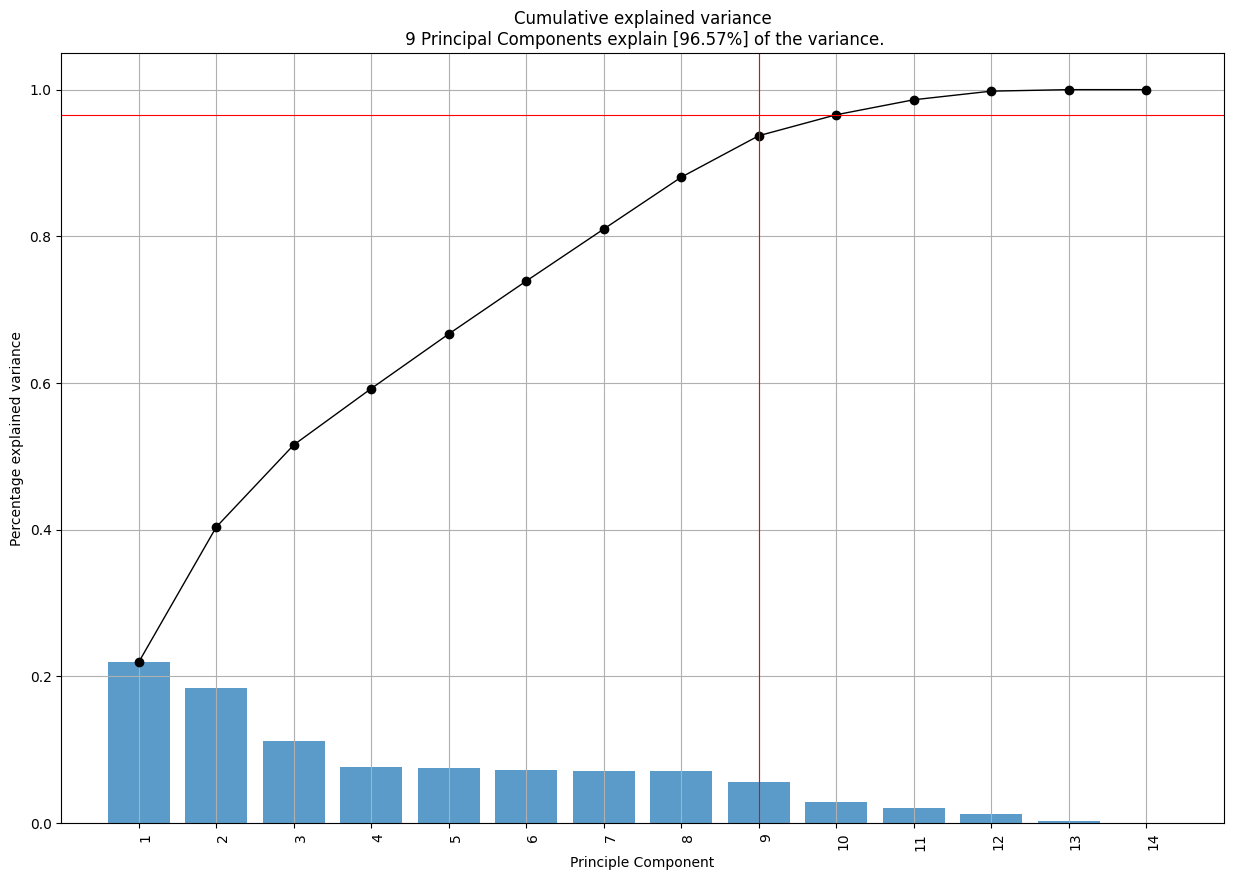

In [ ]:

import matplotlib.pyplot as plt

# Assuming Pca_model is a variable holding your PCA model
fig, ax = Pca_model.plot()

# Correcting the typo in plt.rc
plt.rc('xtick', labelsize=10)

# Correcting the typo and adding 'c' in plt.rc for y-axis
plt.rc('ytick', labelsize=10)


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


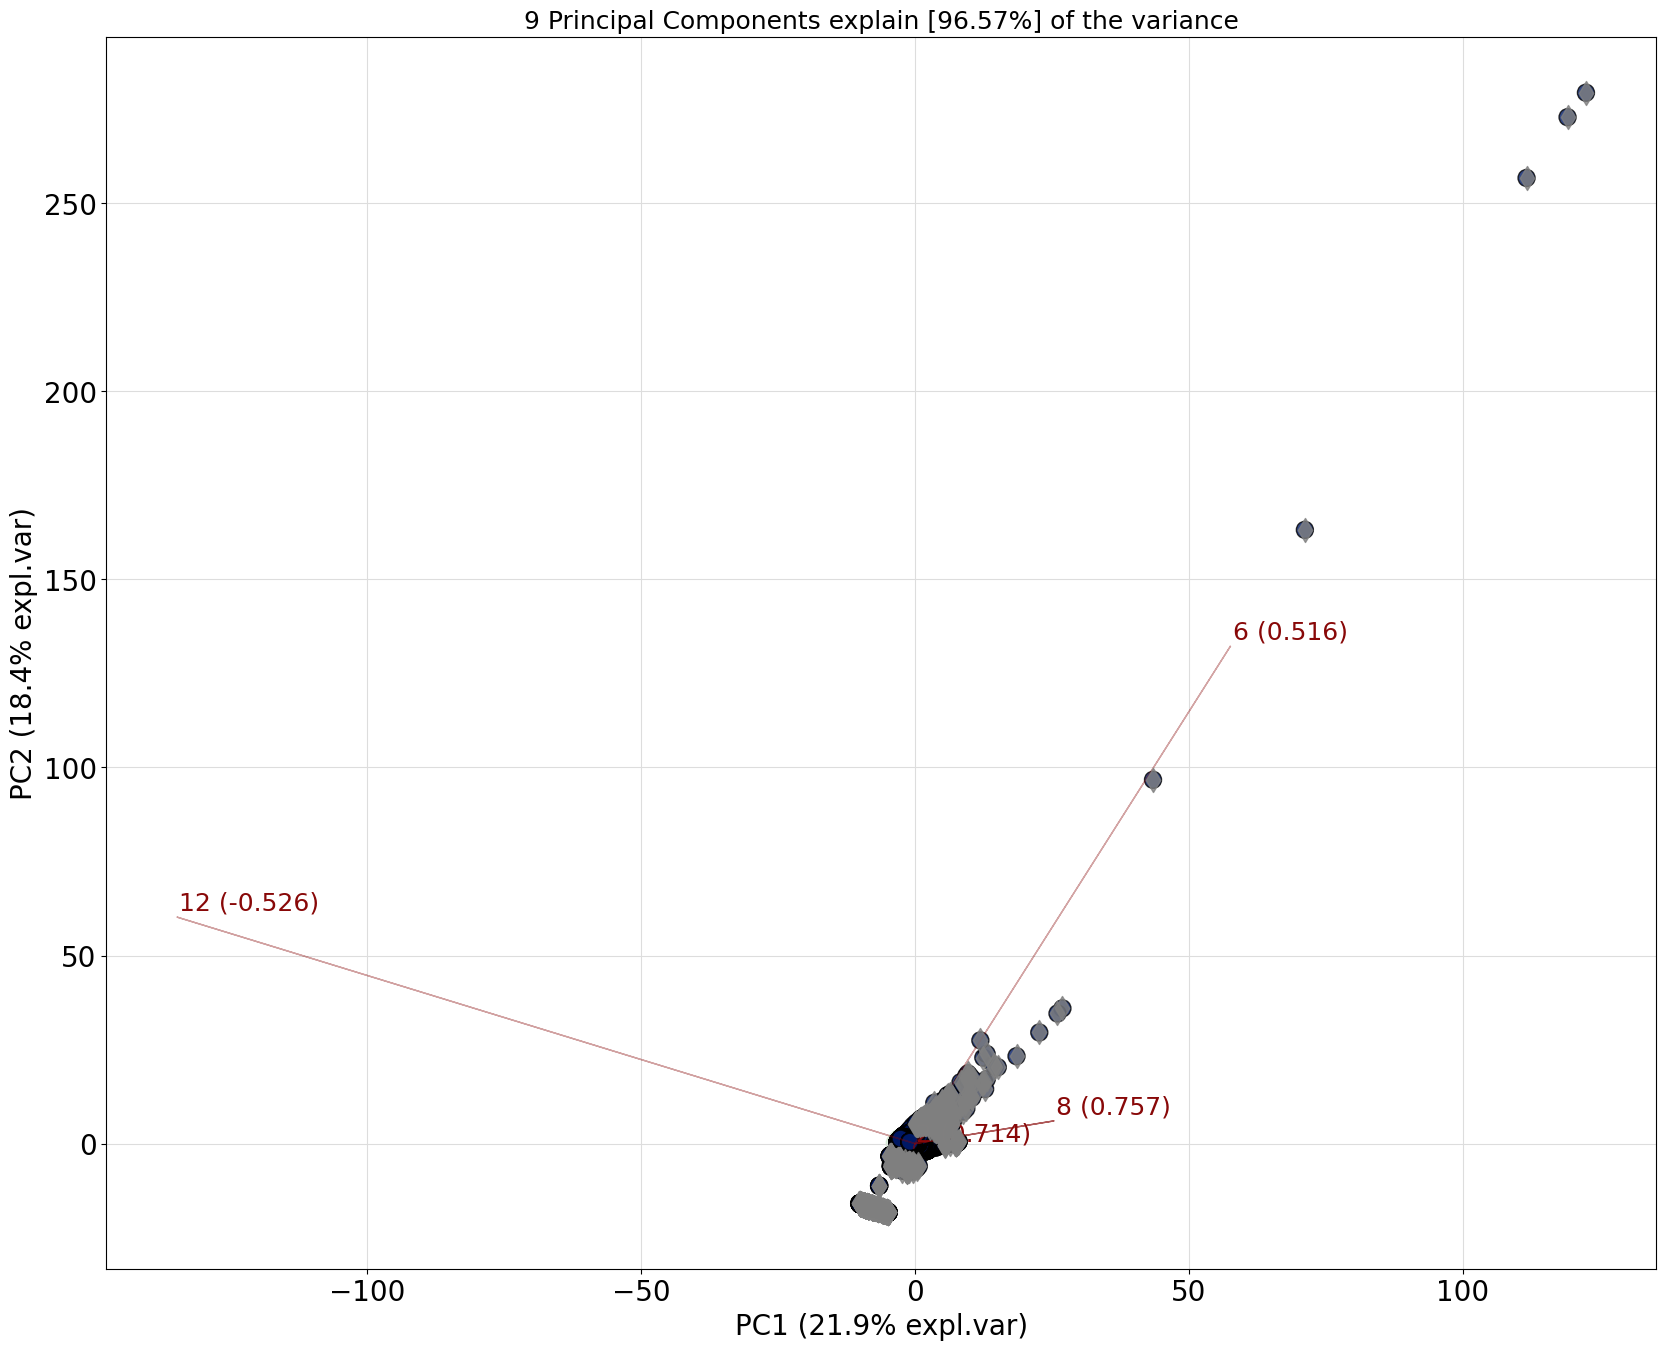

In [ ]:
Pca_model.biplot(n_feat=4, label=True, legend=False, SPE=True, figsize=(20,16))
plt.savefig('PCA_Biplot.png')

In [ ]:
print(results['outliers'])
#https://pypi.org/project/pca

         y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
0       0.999987  0.431867  18.364926   False       False     1.280267
1       0.999987  0.459008  17.949132   False       False     1.276173
2       0.999987  0.484471  17.567441   False       False     1.271518
3       0.999987  0.506879  17.236890   False       False     1.272218
4       0.999987  0.532005  16.870794   False       False     1.259013
...          ...       ...        ...     ...         ...          ...
647506  0.999987  0.461510  17.911304   False       False     1.052542
647507  0.999987  0.449479  18.093958   False       False     1.059454
647508  0.999987  0.420762  18.538215   False       False     1.060668
647509  0.999987  0.378155  19.223976   False       False     1.051752
647510  0.999987  0.350243  19.695122   False       False     1.049080

[647511 rows x 6 columns]


In [ ]:
print(results['topfeat'])


     PC feature   loading  type
0   PC1      12 -0.525975  best
1   PC2       6  0.516418  best
2   PC3       2  0.714381  best
3   PC4       8  0.757296  best
4   PC5       3 -0.839070  best
5   PC6      13 -0.964137  best
6   PC7       9  0.777428  best
7   PC8      11 -0.809073  best
8   PC9       7  0.767279  best
9   PC3       1 -0.596961  weak
10  PC2       4  0.515401  weak
11  PC2       5  0.504999  weak
12  PC1      10 -0.524661  weak
13  PC1      14 -0.522162  weak


In [ ]:
!pip install matplotlib statsmodels pandas


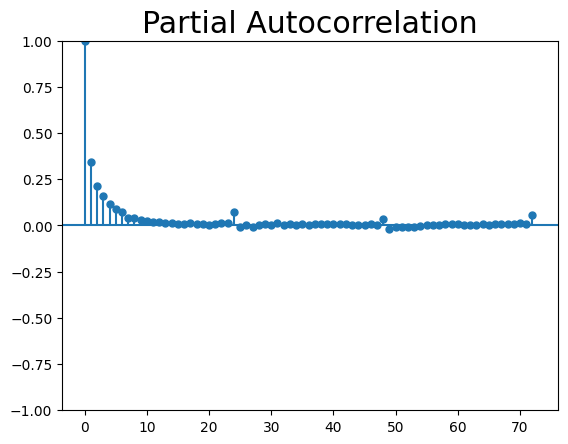

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
import pandas as pd

# df_pd is  DataFrame with the 'PM2_5' column
plot_pacf(df_pandas_imputed['PM2.5'], lags=72)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<ipython-input-109-c06c3b058651>:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_pd_filtered=pandas_cat_df.loc[pandas_cat_df['Station code'] == '120']
df_pd_filtered
df_pd_filtered2=pandas_cat_df.loc[pandas_cat_df['Station code'] == '108']
df_pd_filtered2

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,SO2_Q_SK,NO2_Q_SK,O3_Q_SK,CO_Q_SK,PM10_Q_SK,PM2_5_Q_SK,District
Measurement_date,,,,,,,,,,,,,,,,,,


In [ ]:
print(df_pd_filtered2['PM2.5'].isnull().sum())

0


In [ ]:
# from statsmodels.tsa.stattools import adfuller

# # ADF Test
# result = adfuller(df_pd_filtered2['PM2.5'].values, autolag="AIC")
# print(f'ADF Statistic: {result[0]}')
# print(f'n lags: {result[1]}')
# print(f'p-value: {result[1]}')

# print('Critical Values:')
# for key, value in result[4].items():
#     print(f'{key}: {value}')

# # According to https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
# # The p-value is obtained is a lot less than the significance level of 0.05
# # and the ADF statistic is higher than any of the critical values.
# # Conclusion: the time series is stationary.


In [ ]:
# from statsmodels.tsa.stattools import adfuller

# #https : //www.machine learningplus.com/time-series/augmented-dickey-fuller-test/
# # ADF Test


# result = adfuller (df_pd_filtered2 ['PM2.5'].values, autolag="AIC")
# print (f'ADF Statistic : [result[e]]')
# print (f'n lags : {result[1]}')
# print (f'p-value : {result[1]}')
# for key, value in result[4].items() :
#     print('Critial Values : ')
#     print(f'{key}, {value}')
# # According, #https : //www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/
# # The p-value is obtained is a lot less than significance level of 0.05
# # and the ADF statistic is higher than any of the critical values.
# # Conclusion : time series is stationary.

In [ ]:
# kpss_test(df_pd_filtered2['PM2_5'].values)

In [ ]:
# kpss_test(df_pd_filtered['PM2_5'].values)

In [ ]:
final_data=dataDF

In [ ]:
# #appendix-K Cluster Analysis
# from pyspark.ml.feature import StandardScaler
# scaler = StandardScaler (inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
# from pyspark.ml.clustering import KMeans
# scalerModel = scaler.fit(final_data)
# cluster_final_data = scalerModel.transform(final_data)
# kmeans3 = KMeans (featuresCol='scaledFeatures', k=3)
# kmeans2 = KMeans (featuresCol='scaledFeatures', k=2)
# kmeans6 = KMeans (featuresCol='scaledFeatures',k=6)

In [ ]:
# model_k3= kmeans3.fit(cluster_final_data)
# model_k2 = kmeans2.fit(cluster_final_data)
# model_k6 = kmeans6.fit(cluster_final_data)

In [ ]:
# print(model_k3)

In [ ]:
# #Make predictions #https : //stackoverflow.com/questior
# predictions = model_k3.transform(cluster_final_data)
# ##https : //www.edureka.co/blog/pyspark
# from pyspark.ml.evaluation import ClusteringEvaluator
# # Evaluate clustering by computing Silhouette score
# evaluator=Clustering Evaluator()
# silhouette=evaluator.evaluate(predictions)
# print("Silhouette with squared euclidean distance + str(silhouette))

In [ ]:
# predictions.groupBy('prediction').count().distinct().show()

In [ ]:
# # https://stackoverflow.com/questions/56371503/pyspark-how-to-find-appropriate-number-of-clusters/5657427
# # Calculate cost and plot
# import numpy as np cost = np.zeros(18)
# #kmeans3.fit(cluster_final_data)
# for k in range (2,10) :
#     kmeans =KMeans().setk(k).setSeed (1).setFeatures Col('scaled Features")
#     model = kmeans.fit(cluster_final_data)
#     cost[k] = model.summary.trainingCost
# #Plot the cost
# df_cost = pd.DataFrame (cost[2 : ])
# df_cost.columns = ["cost"]
# new_col = [2,3,4,5,6,7,8, 9]
# df_cost.insert (0, 'cluster', new_col)
# import pylab as plt
# plt.plot(df_cost.cluster, df_cost.cost)
# plt.xlabel("Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

In [ ]:
# # https://stackoverflow.com/questions/56371503/pyspark-how-to-find-appropriate-number-of-clusters/56574274
# # Calculate cost and plot
# import numpy as np
# cost = np.zeros(18)
# #kmeans3.fit(cluster_final_data)
# for k in range (2,10) :
#     kmeans = KMeans().setk(k).setSeed (1).setFeatures Col('scaledFeatures')
#     model = kmeans.fit(cluster_final_data)
#     cost[k] = model.summary.trainingCost
# # Plot the cost
# df_cost = pd.DataFrame (cost [2 : ])
# df_cost.columns = ["cost"]
# new_col= [2,3,4,5,6,7,8, 9]
# df_cost.insert (0, 'cluster", new_col)
# import pylab as plt
# plt.plot(df_cost.cluster, df_cost.cost)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()

In [ ]:
# predictions.groupBy('prediction').count().distinct().show()

In [ ]:
#option3
from pyspark.ml.feature import StringIndexer

In [ ]:
#Ideas from https://stackoverflow.com/questions/36942223/apply-stringindexar-to-saveral-columns-in-a-pyspark-datafrane
Indexers=[StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in list (set(df.columns)-set(['Measurement_date',
                        'Address',
                        'Latitude',
                        'Longitude',
                        'S02',
                        'NO2',
                        '03',
                        'CO',
                        'PM1O',
                        'PM2_5',
                        'S02_Q_SK',
                        'NO2_Q_SK',
                        'O3_Q_SK',
                        'CO_Q_SK' ,
                        'PM10_Q_SK',
                        'PM2_5_Q_SK',
                        'District',]))]
#Indexes [StringIndexer(InputCal-colum, outputCol-column_index") fit(df) transform(df) for column In Hist(set(df.colums)-set(['Measurement_date]
pipeline= Pipeline (stages=indexers)
df_indexed = pipeline.fit(df).transform(df)
df_indexed.show()

In [ ]:
# from pyspark.sql.types import df-dataDF
# # https://www.datasciencemadesimple.com/get-month-year-and-quarter-from-date-in-pyspark/
# # FEATURE ENGINEERING - TIME https://stackoverflow.com/questions/30949202/spark-dataframe-timestamptype-how-to-get-year-month-day-values-from-field
# from pyspark.sql.functions import *
# #df_time=df.select(df['Measurement date']).alias ('Measurement date'), (df['Station code']).alias('Station code'), (df['Latitude']).alias("Latitude'), (df['Longitude"]).alias('Longitude"))
# df_time= df.select (year (df['Measurement_date']).alias (`dt year'), month(df['Measurement_date']).alias ('dt_month"), dayofmonth (df[ Measurement_date']).alias('dt_day'), dayofyear (df['Measurement_date'])
# df_time.show()

In [ ]:
# df=df withColumn('dt_year', year (df [ 'Measurement_date"])) .with Column('dt_month', month(df [ 'Measurement_date])) .with Column('dt_day",dayofmonth(df['Measurement_date'])).with Column('dt_dayofy',day
# df.show(25)